# Install

In [3]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=68d6602b7c36c96b200389b9ba973d58548167a339659358fc32a7d20066b720
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [4]:
pip install wordcloud

# Imports Libraries

In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

nltk.download('punkt')
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download('stopwords')
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Import the Data

In [ ]:
training = pd.read_csv('all_sources_metadata_2020-03-13.csv', encoding='iso-8859-1')

ParserError: Error tokenizing data. C error: EOF inside string starting at row 22461

In [ ]:
# df_clean = pd.read_excel(r"preproc.xlsx")

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sha                          17420 non-null  object 
 1   source_x                     29500 non-null  object 
 2   title                        29491 non-null  object 
 3   doi                          26357 non-null  object 
 4   pmcid                        27337 non-null  object 
 5   pubmed_id                    16730 non-null  float64
 6   license                      17692 non-null  object 
 7   abstract                     26909 non-null  object 
 8   publish_time                 18604 non-null  object 
 9   authors                      28903 non-null  object 
 10  journal                      17791 non-null  object 
 11  Microsoft Academic Paper ID  1134 non-null   float64
 12  WHO #Covidence               1236 non-null   object 
 13  has_full_text   

In [ ]:
training.shape

(29500, 14)

In [ ]:
# keep the unnecessary columns.
training = training[['title','abstract','publish_time']]

In [ ]:
training

title  \
0      Angiotensin-converting enzyme 2 (ACE2) as a SA...   
1      Comparative genetic analysis of the novel coro...   
2      Incubation Period and Other Epidemiological Ch...   
3      Characteristics of and Public Health Responses...   
4           Imaging changes in severe COVID-19 pneumonia   
...                                                  ...   
29495  Prediction of COVID-19 Spreading Profiles in S...   
29496  A deterministic epidemic model for the emergen...   
29497  Data-driven discovery of clinical routes for s...   
29498  Ascertainment rate of novel coronavirus diseas...   
29499  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  
0                                                    NaN         2020  
1                                                    NaN         2020  
2      The geographic spread of 2019 novel coronaviru...         2020  
3      In December 2019, cases of unidentified pneumo...         2020  
4                                                    NaN         2020  
...                                                  ...          ...  
29495  <jats:p>This work applies a data-driven coding...   2020-03-10  
29496  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10  
29497  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10  
29498  <jats:p>We analyzed the epidemiological datase...   2020-03-10  
29499  <jats:p>A novel human coronavirus, now named s...   2020-03-10  

[29500 rows x 3 columns]

# Data Preprocessing
Now, we need to clean-up the text to improve any clustering efforts.

In [ ]:
# def clean_text(text):
#     """
#     This function performs the following operations:
#     1. Removes the punctuations
#     2. Removes the stopwords
#     3. Performs stemming
#     4. Performs lemmatization

#     :param text:
#     :return:

#     Example:
#     Input: "This is a sample text!!!"

#     Output: "sample text"
#     """
#     # Remove the punctuations
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     # Convert the text to lowercase
#     text = text.lower()
#     # Create tokens from the text
#     tokens = word_tokenize(text)
#     # Remove the stopwords
#     tokens = [token for token in tokens if token not in stopwords.words('english')]
#     # Perform stemming
#     stemmer = PorterStemmer()
#     tokens = [stemmer.stem(token) for token in tokens]
#     # Perform lemmatization
#     lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
#     # Join the tokens to form the text
#     text = ' '.join(tokens)
#     return text

## Remove rows that abstracts in NaN

In [ ]:
def remove_null_abstract(df):
    df['abstract'] = df['abstract'].str.strip()
    for i in range(len(df)):
        if df['abstract'][i]== '':
            df['abstract'][i] = None
    training.dropna(subset=['abstract'], inplace=True)
    training.reset_index(drop=True,inplace=True)
    return df

training = remove_null_abstract(training)

In [ ]:
training

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
26904  Prediction of COVID-19 Spreading Profiles in S...   
26905  A deterministic epidemic model for the emergen...   
26906  Data-driven discovery of clinical routes for s...   
26907  Ascertainment rate of novel coronavirus diseas...   
26908  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  
0      The geographic spread of 2019 novel coronaviru...         2020  
1      In December 2019, cases of unidentified pneumo...         2020  
2      The basic reproduction number of an infectious...         2020  
3      The initial cluster of severe pneumonia cases ...         2020  
4      Cruise ships carry a large number of people in...         2020  
...                                                  ...          ...  
26904  <jats:p>This work applies a data-driven coding...   2020-03-10  
26905  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10  
26906  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10  
26907  <jats:p>We analyzed the epidemiological datase...   2020-03-10  
26908  <jats:p>A novel human coronavirus, now named s...   2020-03-10  

[26909 rows x 3 columns]

In [ ]:
training.shape

(26909, 3)

## Handle Possible Duplicates

When we look at the unique values above, we can see that tehre are duplicates. It may have caused because of author submiting the article to multiple journals. Let's remove the duplicats from our dataset:

In [ ]:
training.drop_duplicates(['abstract'], inplace=True)

In [ ]:
training['abstract'].describe(include='all')

count                                                 22809
unique                                                22809
top       The geographic spread of 2019 novel coronaviru...
freq                                                      1
Name: abstract, dtype: object

In [ ]:
training['title'].describe(include='all')

count           22809
unique          22719
top       Sore throat
freq                3
Name: title, dtype: object

In [ ]:
training.shape

(22809, 3)

In [ ]:
is_sorted = training.index.is_monotonic_increasing

# Alternatively, check if the index is sorted in descending order (monotonic decreasing)
# is_sorted = df_cleaned.index.is_monotonic_decreasing

print("Is the index sorted?", is_sorted)

Is the index sorted? True


## Merge two columns(title and abstract)

In [ ]:
# Concatenate two string columns into a new column
training['Title&Abstract'] = training['title'] + '. ' + training['abstract']

In [ ]:
training

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
26904  Prediction of COVID-19 Spreading Profiles in S...   
26905  A deterministic epidemic model for the emergen...   
26906  Data-driven discovery of clinical routes for s...   
26907  Ascertainment rate of novel coronavirus diseas...   
26908  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
26904  <jats:p>This work applies a data-driven coding...   2020-03-10   
26905  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
26906  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
26907  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
26908  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  
0      Incubation Period and Other Epidemiological Ch...  
1      Characteristics of and Public Health Responses...  
2      An updated estimation of the risk of transmiss...  
3      Real-time forecasts of the 2019-nCoV epidemic ...  
4      COVID-19 outbreak on the Diamond Princess crui...  
...                                                  ...  
26904  Prediction of COVID-19 Spreading Profiles in S...  
26905  A deterministic epidemic model for the emergen...  
26906  Data-driven discovery of clinical routes for s...  
26907  Ascertainment rate of novel coronavirus diseas...  
26908  Aerosol and surface stability of HCoV-19 (SARS...  

[22809 rows x 4 columns]

In [ ]:
df = training.copy()

## data cleaninig

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tqdm import tqdm
import nltk
# Download the WordNet resource
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_text(text):
    """
    This function performs the following operations:
    1. Removes the punctuations
    2. Removes the stopwords
    3. Performs stemming
    4. Performs lemmatization

    :param text:
    :return:

    Example:
    Input: "This is a sample text!!!"

    Output: "sample text"
    """
    # Remove the punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert the text to lowercase
    text = text.lower()
    # Create tokens from the text
    tokens = word_tokenize(text)
    # Remove the stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Perform stemming
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens to form the text
    # text = ' '.join(tokens)

    # Remove special characters and Remove standalone numbers
    # tokens = [re.sub(r'\b\d+\b', '', re.sub('[^a-zA-Z0-9]', '', token)) for token in tokens]
    tokens = [re.sub(r'\b\d+\b', '', re.sub('[^a-zA-Z0-9]', '', token)) for token in tokens if re.sub(r'\b\d+\b', '', re.sub('[^a-zA-Z0-9]', '', token))]
    text = ' '.join(tokens)
    # joined_tokens = [" ".join(tweet_without_stopwords)]
    return text, tokens

# Assuming you have already imported the necessary libraries and modules

# Apply the clean_text function to the 'Title&Abstract' column


In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# dfc = df.sample(n=10, random_state=42)

In [ ]:
df['string_Title&Abstract'], df['Title&Abstract']= zip(*df['Title&Abstract'].progress_apply(clean_text))
# dfc['string_Title&Abstract'], dfc['Title&Abstract'] = zip(*dfc['Title&Abstract'].progress_apply(clean_text))

100%|██████████| 22809/22809 [12:31<00:00, 30.36it/s]


In [ ]:
df

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
26904  Prediction of COVID-19 Spreading Profiles in S...   
26905  A deterministic epidemic model for the emergen...   
26906  Data-driven discovery of clinical routes for s...   
26907  Ascertainment rate of novel coronavirus diseas...   
26908  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
26904  <jats:p>This work applies a data-driven coding...   2020-03-10   
26905  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
26906  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
26907  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
26908  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  \
0      [incub, period, epidemiolog, characterist, nov...   
1      [characterist, public, health, respons, corona...   
2      [updat, estim, risk, transmiss, novel, coronav...   
3      [realtim, forecast, 2019ncov, epidem, china, f...   
4      [covid19, outbreak, diamond, princess, cruis, ...   
...                                                  ...   
26904  [predict, covid19, spread, profil, south, kore...   
26905  [determinist, epidem, model, emerg, covid19, c...   
26906  [datadriven, discoveri, clinic, rout, sever, d...   
26907  [ascertain, rate, novel, coronaviru, diseas, c...   
26908  [aerosol, surfac, stabil, hcov19, sarscov2, co...   

                                   string_Title&Abstract  
0      incub period epidemiolog characterist novel co...  
1      characterist public health respons coronaviru ...  
2      updat estim risk transmiss novel coronaviru 20...  
3      realtim forecast 2019ncov epidem china februar...  
4      covid19 outbreak diamond princess cruis ship e...  
...                                                  ...  
26904  predict covid19 spread profil south korea ital...  
26905  determinist epidem model emerg covid19 china j...  
26906  datadriven discoveri clinic rout sever detect ...  
26907  ascertain rate novel coronaviru diseas covid19...  
26908  aerosol surfac stabil hcov19 sarscov2 compar s...  

[22809 rows x 5 columns]

In [ ]:
df.to_excel('preproc2.xlsx', index=False)

# Some feature engineering


### word count

Adding word count columns for both abstract and title can be useful parameters later:

In [ ]:
df['Title&Abstract_word_count'] = df['Title&Abstract'].apply(lambda x: len(x))  # word count in abstract
df['Abstract_unique_words'] = df['abstract'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df.head()

title  \
0  Incubation Period and Other Epidemiological Ch...   
1  Characteristics of and Public Health Responses...   
2  An updated estimation of the risk of transmiss...   
3  Real-time forecasts of the 2019-nCoV epidemic ...   
4  COVID-19 outbreak on the Diamond Princess crui...   

                                            abstract publish_time  \
0  The geographic spread of 2019 novel coronaviru...         2020   
1  In December 2019, cases of unidentified pneumo...         2020   
2  The basic reproduction number of an infectious...         2020   
3  The initial cluster of severe pneumonia cases ...         2020   
4  Cruise ships carry a large number of people in...         2020   

                                      Title&Abstract  \
0  [incub, period, epidemiolog, characterist, nov...   
1  [characterist, public, health, respons, corona...   
2  [updat, estim, risk, transmiss, novel, coronav...   
3  [realtim, forecast, 2019ncov, epidem, china, f...   
4  [covid19, outbreak, diamond, princess, cruis, ...   

   Title&Abstract_word_count  Abstract_unique_words  
0                        114                    110  
1                        132                    150  
2                        148                    156  
3                        212                    204  
4                        175                    173

In [ ]:
training['abstract'].describe(include='all')

count                                                 22809
unique                                                22809
top       The geographic spread of 2019 novel coronaviru...
freq                                                      1
Name: abstract, dtype: object

In [ ]:
training['title'].describe(include='all')

count           22809
unique          22719
top       Sore throat
freq                3
Name: title, dtype: object

## Take a Look at the Data:

### Handling multiple languages
Next we are going to determine the language of each paper in the dataframe. Not all of the sources are English and the language needs to be identified so that we know how handle these instances

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=aadb0d17bf3f70c83aac37c83e508a66a7a517fc4ac049f86249b6ee51e02654
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['abstract'].split(" ")

    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:

            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract'])
            except Exception as e:
                lang = "unknown"
                pass

    # get the language
    languages.append(lang)

 13%|█▎        | 2863/22809 [00:22<02:37, 127.00it/s]


KeyboardInterrupt: 

In [ ]:
df

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
26904  Prediction of COVID-19 Spreading Profiles in S...   
26905  A deterministic epidemic model for the emergen...   
26906  Data-driven discovery of clinical routes for s...   
26907  Ascertainment rate of novel coronavirus diseas...   
26908  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
26904  <jats:p>This work applies a data-driven coding...   2020-03-10   
26905  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
26906  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
26907  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
26908  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  
0      Incubation Period and Other Epidemiological Ch...  
1      Characteristics of and Public Health Responses...  
2      An updated estimation of the risk of transmiss...  
3      Real-time forecasts of the 2019-nCoV epidemic ...  
4      COVID-19 outbreak on the Diamond Princess crui...  
...                                                  ...  
26904  Prediction of COVID-19 Spreading Profiles in S...  
26905  A deterministic epidemic model for the emergen...  
26906  Data-driven discovery of clinical routes for s...  
26907  Ascertainment rate of novel coronavirus diseas...  
26908  Aerosol and surface stability of HCoV-19 (SARS...  

[22809 rows x 4 columns]

In [ ]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)

print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 2863

{'da': 4, 'de': 2, 'en': 2840, 'es': 11, 'fr': 1, 'pt': 5}


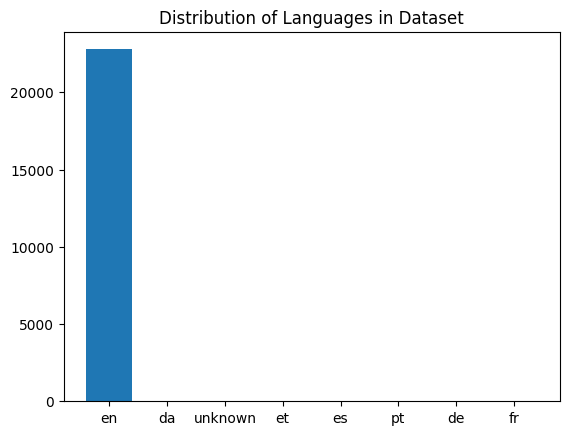

In [ ]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

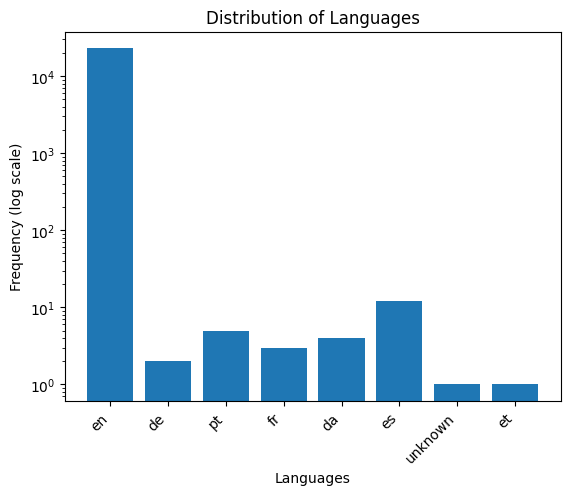

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Assuming 'languages' is your list of languages
# Replace 'languages' with the actual name of your list

# Count occurrences of each language
languages_counter = Counter(languages)

# Create a bar plot with a logarithmic y-axis scale
plt.bar(languages_counter.keys(), languages_counter.values())
plt.yscale('log')  # Set the y-axis scale to logarithmic

# Set labels and title
plt.xlabel('Languages')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Languages')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


We will be dropping any language that is not English. Attempting to translate foreign texts gave the following problems:
1. Translating the language may not carry over the true semantic meaning of the text
2. etc ..


In [ ]:
df = df[df['language'] == 'en']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22781 entries, 0 to 26908
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           22781 non-null  object
 1   abstract        22781 non-null  object
 2   publish_time    13316 non-null  object
 3   Title&Abstract  22781 non-null  object
 4   language        22781 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [ ]:
df.shape

(22809, 4)

In [ ]:
 # Find indices of the target value in the list
indices = [index for index, value in enumerate(languages) if value == 'da']

print(f"Indices of : {indices}")

Indices of : [684, 744, 772, 773]


### next step

In [ ]:
rmv = [802,806,811,684,744,772,773]
df = df.drop(rmv)

KeyError: '[802, 806, 811, 684, 744, 772, 773] not found in axis'

In [ ]:
is_sorted = df.index.is_monotonic_increasing

# Alternatively, check if the index is sorted in descending order (monotonic decreasing)
# is_sorted = df_cleaned.index.is_monotonic_decreasing

print("Is the index sorted?", is_sorted)

Is the index sorted? True


In [ ]:
# Expected set of indices
expected_indices = {0, 1, 2}

# Check if all indices exist
all_indices_exist = set(df.index) == expected_indices

if all_indices_exist:
    print("All indices exist in the DataFrame.")
else:
    print("Not all indices exist in the DataFrame.")

Not all indices exist in the DataFrame.


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
# Expected set of indices
expected_indices = {0, 1, 2}

# Find missing indices
missing_indices = expected_indices - set(df.index)

if not missing_indices:
    print("All indices exist in the DataFrame.")
else:
    print("Missing indices:", missing_indices)

All indices exist in the DataFrame.


In [ ]:
df

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
26904  Prediction of COVID-19 Spreading Profiles in S...   
26905  A deterministic epidemic model for the emergen...   
26906  Data-driven discovery of clinical routes for s...   
26907  Ascertainment rate of novel coronavirus diseas...   
26908  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
26904  <jats:p>This work applies a data-driven coding...   2020-03-10   
26905  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
26906  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
26907  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
26908  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  
0      Incubation Period and Other Epidemiological Ch...  
1      Characteristics of and Public Health Responses...  
2      An updated estimation of the risk of transmiss...  
3      Real-time forecasts of the 2019-nCoV epidemic ...  
4      COVID-19 outbreak on the Diamond Princess crui...  
...                                                  ...  
26904  Prediction of COVID-19 Spreading Profiles in S...  
26905  A deterministic epidemic model for the emergen...  
26906  Data-driven discovery of clinical routes for s...  
26907  Ascertainment rate of novel coronavirus diseas...  
26908  Aerosol and surface stability of HCoV-19 (SARS...  

[22809 rows x 4 columns]

In [ ]:
df.shape

(22809, 4)

### Let's take a look at word count in the papers

In [ ]:
import seaborn as sns

<ipython-input-37-f106c88f1ab1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Title&Abstract_word_count'])


count    22809.000000
mean       140.221798
std        128.983759
min          6.000000
25%        105.000000
50%        139.000000
75%        170.000000
max      15153.000000
Name: Title&Abstract_word_count, dtype: float64

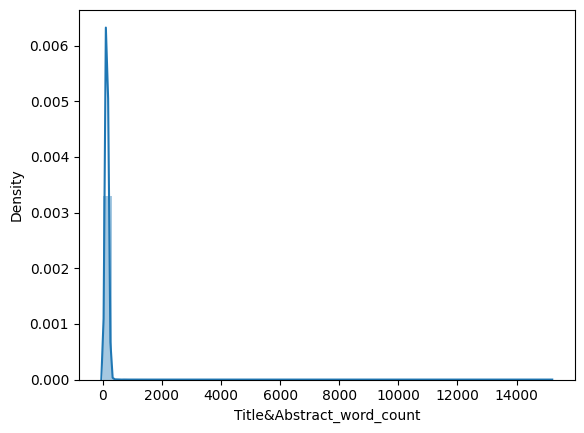

In [ ]:
sns.distplot(df['Title&Abstract_word_count'])
df['Title&Abstract_word_count'].describe()

<ipython-input-38-d0fbae6bde70>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Abstract_unique_words'])


count    22809.000000
mean       132.629488
std         67.372419
min          1.000000
25%        105.000000
50%        133.000000
75%        159.000000
max       6326.000000
Name: Abstract_unique_words, dtype: float64

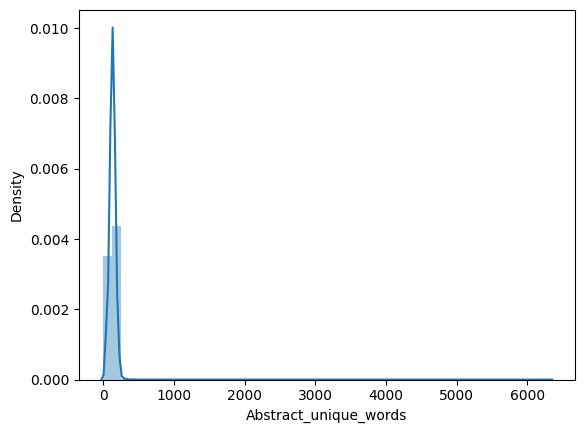

In [ ]:
sns.distplot(df['Abstract_unique_words'])
df['Abstract_unique_words'].describe()

نشون میده که بیشترین خلاصه ای که داشتیم ۲۰۰۰۰تا لغت داشته اما بیشترین میزان کلمه یونیک در حدود ۵۰۰۰ بوده

These two plots give us a good idea of the content we are dealing with. Most papers are about 1000 words in length. The long tails in both plots are caused by outliers. In fact, ~98% of the papers are under 4,000 words in length while a select few are over 14,000!

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
26904  Prediction of COVID-19 Spreading Profiles in S...   
26905  A deterministic epidemic model for the emergen...   
26906  Data-driven discovery of clinical routes for s...   
26907  Ascertainment rate of novel coronavirus diseas...   
26908  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
26904  <jats:p>This work applies a data-driven coding...   2020-03-10   
26905  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
26906  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
26907  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
26908  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  \
0      [incub, period, epidemiolog, characterist, nov...   
1      [characterist, public, health, respons, corona...   
2      [updat, estim, risk, transmiss, novel, coronav...   
3      [realtim, forecast, 2019ncov, epidem, china, f...   
4      [covid19, outbreak, diamond, princess, cruis, ...   
...                                                  ...   
26904  [predict, covid19, spread, profil, south, kore...   
26905  [determinist, epidem, model, emerg, covid19, c...   
26906  [datadriven, discoveri, clinic, rout, sever, d...   
26907  [ascertain, rate, novel, coronaviru, diseas, c...   
26908  [aerosol, surfac, stabil, hcov19, sarscov2, co...   

                                   string_Title&Abstract  
0      incub period epidemiolog characterist novel co...  
1      characterist public health respons coronaviru ...  
2      updat estim risk transmiss novel coronaviru 20...  
3      realtim forecast 2019ncov epidem china februar...  
4      covid19 outbreak diamond princess cruis ship e...  
...                                                  ...  
26904  predict covid19 spread profil south korea ital...  
26905  determinist epidem model emerg covid19 china j...  
26906  datadriven discoveri clinic rout sever detect ...  
26907  ascertain rate novel coronaviru diseas covid19...  
26908  aerosol surfac stabil hcov19 sarscov2 compar s...  

[22809 rows x 5 columns]

In [6]:
df_clean = pd.read_excel(r"df_clean.xlsx")

In [ ]:
df_clean2 = df_clean.copy()

In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
22795  Prediction of COVID-19 Spreading Profiles in S...   
22796  A deterministic epidemic model for the emergen...   
22797  Data-driven discovery of clinical routes for s...   
22798  Ascertainment rate of novel coronavirus diseas...   
22799  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract  \
0      The geographic spread of 2019 novel coronaviru...   
1      In December 2019, cases of unidentified pneumo...   
2      The basic reproduction number of an infectious...   
3      The initial cluster of severe pneumonia cases ...   
4      Cruise ships carry a large number of people in...   
...                                                  ...   
22795  <jats:p>This work applies a data-driven coding...   
22796  <jats:p>Coronavirus disease (COVID-19) broke o...   
22797  <jats:p>The outbreak of COVID-19 epidemic has ...   
22798  <jats:p>We analyzed the epidemiological datase...   
22799  <jats:p>A novel human coronavirus, now named s...   

                                          Title&Abstract  \
0      ['incub', 'period', 'epidemiolog', 'characteri...   
1      ['characterist', 'public', 'health', 'respons'...   
2      ['updat', 'estim', 'risk', 'transmiss', 'novel...   
3      ['realtim', 'forecast', '2019ncov', 'epidem', ...   
4      ['covid19', 'outbreak', 'diamond', 'princess',...   
...                                                  ...   
22795  ['predict', 'covid19', 'spread', 'profil', 'so...   
22796  ['determinist', 'epidem', 'model', 'emerg', 'c...   
22797  ['datadriven', 'discoveri', 'clinic', 'rout', ...   
22798  ['ascertain', 'rate', 'novel', 'coronaviru', '...   
22799  ['aerosol', 'surfac', 'stabil', 'hcov19', 'sar...   

                                   string_Title&Abstract  \
0      incub period epidemiolog characterist novel co...   
1      characterist public health respons coronaviru ...   
2      updat estim risk transmiss novel coronaviru 20...   
3      realtim forecast 2019ncov epidem china februar...   
4      covid19 outbreak diamond princess cruis ship e...   
...                                                  ...   
22795  predict covid19 spread profil south korea ital...   
22796  determinist epidem model emerg covid19 china j...   
22797  datadriven discoveri clinic rout sever detect ...   
22798  ascertain rate novel coronaviru diseas covid19...   
22799  aerosol surfac stabil hcov19 sarscov2 compar s...   

       Title&Abstract_word_count  Abstract_unique_words language  
0                            114                    110       en  
1                            132                    150       en  
2                            148                    156       en  
3                            212                    204       en  
4                            175                    173       en  
...                          ...                    ...      ...  
22795                        103                     97       en  
22796                         67                     80       en  
22797                         52                     57       en  
22798                         45                     53       en  
22799                         51                     61       en  

[22800 rows x 7 columns]

# Vectorization

Now that we have pre-processed the data, it is time to convert it into a format that can be handled by our algorithms. For this purpose we will be using tf-idf. This will convert our string formatted data into a measure of how important each word is to the instance out of the literature as a whole.

## TF-IDF Embedding

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

def convert_TF_IDF(text, maxx_features):
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    embeddings = vectorizer.fit_transform(text)
    return embeddings, vectorizer.get_feature_names_out()

In [8]:
# Vectorize the text and get feature names
embd_tf_idf, tfidf_feature_names = convert_TF_IDF(df_clean['Title&Abstract'].astype(str), 2 ** 8)

In [9]:
embd_tf_idf.shape

(22800, 256)

In [10]:
tfidf_feature_names

array(['acid', 'activ', 'acut', 'addit', 'affect', 'age', 'agent', 'also',
       'although', 'among', 'analysi', 'anim', 'antibodi', 'antigen',
       'antivir', 'approach', 'assay', 'associ', 'avail', 'background',
       'base', 'bat', 'bind', 'biolog', 'care', 'case', 'caus', 'cell',
       'cellular', 'challeng', 'chang', 'character', 'child', 'china',
       'clinic', 'collect', 'combin', 'common', 'compar', 'complex',
       'conclus', 'confirm', 'contain', 'contribut', 'control',
       'coronaviru', 'could', 'countri', 'critic', 'cultur', 'current',
       'data', 'day', 'decreas', 'demonstr', 'describ', 'design',
       'detect', 'determin', 'develop', 'differ', 'diseas', 'dna',
       'domain', 'drug', 'due', 'earli', 'effect', 'effici', 'emerg',
       'enhanc', 'entri', 'epidem', 'epidemiolog', 'estim', 'evalu',
       'evid', 'examin', 'express', 'factor', 'famili', 'find', 'first',
       'follow', 'form', 'found', 'function', 'fusion', 'gene', 'gener',
       'genet', '

In [ ]:
# for find best value for LDA and TF-idf feautes. i run this in firt run and get 256.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assuming you have a list of processed texts in 'text' and no target variable for topic modeling

# Define the pipeline with TfidfVectorizer and LDA
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lda', LatentDirichletAllocation())
])

# Define the parameter grid for TfidfVectorizer and LDA
param_grid = {
    'tfidf__max_features': [2 ** i for i in range(7, 10)],  # Adjust the range as needed
    'lda__n_components': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Adjust the range as needed
}


# Create the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(df_clean['string_Title&Abstract'])

# Print the best parameters and their corresponding log-likelihood
print("Best max_features:", grid_search.best_params_['tfidf__max_features'])
print("Best n_components:", grid_search.best_params_['lda__n_components'])
print("Best Log-Likelihood:", grid_search.best_score_)

KeyboardInterrupt: 

we choose 2**8 for best max_features.and 40 for best component for LDA.

## BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def convert_BoW(text):
    bwVectorizer = CountVectorizer(min_df=0.005, max_df=0.995, max_features=300)
    text_vectors = bwVectorizer.fit_transform(text)
    text_Feature = bwVectorizer.get_feature_names_out() #Feature names
    bow_text_vectors = text_vectors.toarray() #vectors
    return bow_text_vectors, text_Feature
# print("Feature names:", text_vocab)
# print("Bag-of-Words vectors:", bow_text_vectors)

In [ ]:
embd_BoW, boW_Feature = convert_BoW(df_clean['Title&Abstract'].astype(str))
# embd_BoW = convert_BoW(df['Title&Abstract'])

In [ ]:
boW_Feature

array(['acid', 'activ', 'acut', 'addit', 'affect', 'age', 'agent', 'also',
       'although', 'among', 'analysi', 'analyz', 'anim', 'antibodi',
       'antigen', 'antivir', 'approach', 'assay', 'assess', 'associ',
       'avail', 'background', 'bacteri', 'base', 'bat', 'bind', 'biolog',
       'blood', 'care', 'case', 'caus', 'cell', 'cellular', 'challeng',
       'chang', 'character', 'child', 'china', 'clinic', 'collect',
       'combin', 'common', 'compar', 'complex', 'conclus', 'confirm',
       'contact', 'contain', 'contribut', 'control', 'coronaviru',
       'coronavirus', 'correl', 'could', 'countri', 'covid19', 'critic',
       'cultur', 'current', 'cytokin', 'data', 'day', 'death', 'decreas',
       'demonstr', 'describ', 'design', 'detect', 'determin', 'develop',
       'diagnosi', 'diagnost', 'differ', 'diseas', 'divers', 'dna',
       'domain', 'drug', 'due', 'earli', 'effect', 'effici', 'emerg',
       'enhanc', 'entri', 'epidem', 'epidemiolog', 'establish', 'estim',
    

## Bert Embedding

In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
BERT_tokenizer = BertTokenizer.from_pretrained(model_name)
BERT_model = BertModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=b13b4b8af8971891b43c035f761147a4850d64e673d256992f1db2bcc3544c7f
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model_bert = SentenceTransformer('bert-base-nli-max-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/391 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# embedding_bert = np.array(model_bert.encode(sentences, show_progress_bar=True))

In [ ]:
# df_clean['s_Title&Abstract'] = df_clean['Title&Abstract'].astype(str)

In [ ]:
def convert_str(word_list):
  result_str = ' '.join(word_list)
  return result_str

# convert_str(df_clean['Title&Abstract'])

100%|██████████| 22809/22809 [00:01<00:00, 11453.79it/s]


In [ ]:
import ast

def string_list_to_string(input_str):
    """
    Converts a string representation of a list of words into a string with words separated by spaces.

    :param input_str: String representation of a list
    :return: String representation
    """
    # Convert the string representation of the list to an actual list
    word_list = ast.literal_eval(input_str)

    # Join the list of words into a single string
    return ' '.join(word_list)


result_string = string_list_to_string(df_clean['Title&Abstract'][0])

In [ ]:
df_clean.reset_index(drop=True,inplace=True)

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
df_clean['str_Title&Abstract'] = df_clean['Title&Abstract'].progress_apply(convert_str)

100%|██████████| 22809/22809 [00:01<00:00, 16349.71it/s]


In [ ]:
embedding_bert = np.array(model_bert.encode(df_clean['str_Title&Abstract'], show_progress_bar=True))

Batches:   0%|          | 0/713 [00:00<?, ?it/s]

In [ ]:
embedding_bert

array([[0.95642483, 1.4777919 , 1.1449745 , ..., 0.6900206 , 0.79821   ,
        1.2357628 ],
       [1.1068654 , 1.7577313 , 1.1161429 , ..., 0.91286373, 0.7475501 ,
        1.142001  ],
       [0.66884965, 1.3755397 , 1.0156195 , ..., 0.6400207 , 0.8189655 ,
        1.2691767 ],
       ...,
       [0.88219714, 1.4702142 , 0.94469535, ..., 0.79312134, 0.8372953 ,
        1.1553302 ],
       [0.73882425, 1.4378049 , 1.031784  , ..., 0.90661085, 0.92605275,
        0.99398917],
       [0.9028059 , 1.5150924 , 0.8650309 , ..., 0.8593327 , 0.88094795,
        1.1590745 ]], dtype=float32)

In [ ]:
#Bert embeddings are shape of 768
print("Bert Embedding shape", embedding_bert.shape)
print("Bert Embedding sample", embedding_bert[0][0:50])

Bert Embedding shape (22809, 768)
Bert Embedding sample [ 0.95642483  1.4777919   1.1449745   0.49548253  1.3559537   0.6466954
  0.58960414  0.5614143   0.7800323   0.29408646  0.39570412  1.4231488
  1.245007    0.9477708   0.8628736   0.72218233  1.4704894  -0.3651067
  0.8238612   0.01414983  0.84865505 -0.0617238   0.43689516  0.48440343
  1.7969375   1.1189007   0.3985468   0.6293938   0.26272684  0.4992887
  0.83863664  1.769139    0.0391336   0.8485354   0.94103855  0.8234578
  0.5441032  -0.18004134  0.7189036   0.06217491  1.7024637   0.48491824
  0.38461256  0.0677959   0.01121936  0.42753646 -0.33813083 -0.00919996
 -0.36699322  1.1575886 ]


In [ ]:
# df_clean['Title&Abstract'][9977]
df_clean.to_excel('df_clean2.xlsx', index=False)

In [ ]:
import pickle
with open("my-embeddings.pkl", "wb") as fOut:
    pickle.dump({'embeddings': embedding_bert},fOut)

In [ ]:
embedding_bert.shape

(22809, 768)

## Glove

In [ ]:
import numpy as np

def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r',encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model
glove_model_path = 'glove.6B.100d.txt'  # path to your GloVe file
glove_model = load_glove_model(glove_model_path)

## word2vec

# LDA Model
Perform Latent Dirichlet Allocation (LDA)

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

def apply_lda(embedding_data, num_topics=20, random_state=42):
    """
    Apply Latent Dirichlet Allocation (LDA) to the given embedding data.

    Parameters:
    - embedding_data: The input data for LDA.
    - num_topics: Number of topics or components (default is 20).
    - random_state: Random seed for reproducibility (default is 42).

    Returns:
    - lda_matrix: Resulting LDA matrix.
    - lda_components: Components of the LDA model.
    """
    # Create LDA object
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=random_state)

    # Fit and Transform LDA model on data
    lda_matrix = lda_model.fit_transform(embedding_data)

    # Get Components
    lda_components = lda_model.components_

    # Print the shape of the resulting LDA matrix
    print("Shape of LDA matrix:", lda_matrix.shape)

    return lda_matrix, lda_components

## TF-IDF

In [12]:
tfidf_lda_result, tfidf_lda_components = apply_lda(embd_tf_idf,40)

Shape of LDA matrix: (22800, 40)


## BoW

In [ ]:
bow_lda_result, bowـlda_components = apply_lda(embd_BoW,40)

Shape of LDA matrix: (22800, 40)


## Extract top words for each topic

In [13]:
def extract_top_words(lda_components, feature_names, top_words=20):
    """
    Extract the top words for each topic in LDA.

    Parameters:
    - lda_components: Components obtained from LDA.
    - feature_names: Names of the features.
    - top_words: Number of top words to extract for each topic (default is 20).

    Returns:
    - top_words_lists: List of lists containing top words for each topic.
    """
    top_words_lists = []

    # Extract top words for each topic
    for index, component in enumerate(lda_components):
        zipped = zip(feature_names, component)
        top_feature_names_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:top_words]
        top_feature_names_list = list(dict(top_feature_names_key).keys())
        top_words_lists.append(top_feature_names_list)
        print("Topic " + str(index) + ": ", top_feature_names_list)

    return top_words_lists

### TF-IDF

In [14]:
# apply extract_top_words() for tf-idf vectorization
top_words_tfidf = extract_top_words(lda_components=tfidf_lda_components, feature_names=tfidf_feature_names, top_words=20)

Topic 0:  ['vaccin', 'immun', 'protect', 'respons', 'viru', 'challeng', 'antibodi', 'antigen', 'develop', 'mous', 'induc', 'dna', 'recombin', 'cell', 'protein', 'express', 'infect', 'effect', 'human', 'use']
Topic 1:  ['genom', 'sequenc', 'viru', 'viral', 'gene', 'analysi', 'rna', 'dna', 'novel', 'use', 'speci', 'genet', 'identifi', 'human', 'detect', 'sampl', 'famili', 'new', 'protein', 'mutat']
Topic 2:  ['fusion', 'entri', 'protein', 'cell', 'membran', 'viru', 'sarscov', 'glycoprotein', 'viral', 'infect', 'coronaviru', 'activ', 'receptor', 'inhibit', 'host', 'requir', 'domain', 'bind', 'express', 'target']
Topic 3:  ['cell', 'protein', 'pathway', 'activ', 'replic', 'infect', 'viru', 'inhibit', 'regul', 'signal', 'induc', 'viral', 'cellular', 'express', 'role', 'interact', 'respons', 'host', 'mechan', 'function']
Topic 4:  ['risk', 'factor', 'associ', 'infect', 'diseas', 'studi', 'increas', 'popul', 'among', 'age', 'patient', 'respiratori', 'use', 'mortal', 'control', 'transmiss', 'r

### BoW

In [ ]:
top_words_bow = extract_top_words(lda_components=bowـlda_components, feature_names=boW_Feature, top_words=20)

Topic 0:  ['merscov', 'syndrom', 'respiratori', 'coronaviru', 'infect', 'case', 'emerg', 'report', 'human', 'caus', 'sever', 'first', 'develop', 'identifi', 'may', 'potenti', 'high', 'outbreak', 'diseas', 'rate']
Topic 1:  ['porcin', 'pig', 'viru', 'anim', 'epidem', 'transmiss', 'infect', 'studi', 'caus', 'sampl', 'first', 'posit', 'observ', 'detect', 'investig', 'found', 'result', 'high', 'day', 'diseas']
Topic 2:  ['vaccin', 'immun', 'respons', 'antigen', 'induc', 'recombin', 'dna', 'protein', 'express', 'develop', 'protect', 'mous', 'use', 'result', 'challeng', 'studi', 'compar', 'antibodi', 'cell', 'evalu']
Topic 3:  ['rna', 'replic', 'viru', 'hepat', 'viral', 'cell', 'infect', 'vitro', 'mous', 'effici', 'protein', 'requir', 'result', 'suggest', 'genom', 'demonstr', 'vivo', 'dna', 'system', 'product']
Topic 4:  ['bind', 'acid', 'receptor', 'site', 'surfac', 'specif', 'differ', 'posit', 'domain', 'select', 'interact', 'show', 'cell', 'structur', 'two', 'determin', 'protein', 'use', 

In [ ]:
from gensim import corpora, models
from pprint import pprint

# Example list of topics
topics_list = top_words_bow
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(topics_list)
corpus = [dictionary.doc2bow(topic) for topic in topics_list]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=len(topics_list), id2word=dictionary)

# Print the topics and associated words
pprint(lda_model.print_topics())

# Example document (list of words)
documents = df_clean['Title&Abstract'].tolist()  # Convert the Series to a list of documents
# Flatten the list of documents
flat_documents = [word for doc in documents for word in doc]
# Transform the document to the LDA space
document_bow = dictionary.doc2bow(flat_documents)

document_lda = lda_model[document_bow]

# Print the most relevant topic for the document
print("Most relevant topic:", max(document_lda, key=lambda x: x[1])[0])

[(39,
  '0.004*"sar" + 0.004*"enhanc" + 0.004*"significantli" + 0.004*"serum" + '
  '0.004*"correl" + 0.004*"blood" + 0.004*"sarscov" + 0.004*"could" + '
  '0.004*"highli" + 0.004*"symptom"'),
 (5,
  '0.035*"human" + 0.032*"caus" + 0.032*"infect" + 0.028*"posit" + '
  '0.028*"high" + 0.028*"first" + 0.027*"diseas" + 0.018*"respiratori" + '
  '0.018*"identifi" + 0.017*"studi"'),
 (9,
  '0.036*"spread" + 0.032*"cell" + 0.031*"mechan" + 0.031*"caus" + '
  '0.029*"human" + 0.029*"viru" + 0.029*"infect" + 0.029*"primari" + '
  '0.028*"tissu" + 0.026*"cultur"'),
 (22,
  '0.039*"anim" + 0.039*"transmiss" + 0.039*"host" + 0.039*"speci" + '
  '0.039*"human" + 0.039*"group" + 0.039*"relat" + 0.039*"viru" + '
  '0.039*"sever" + 0.039*"common"'),
 (12,
  '0.041*"posit" + 0.038*"antigen" + 0.038*"serum" + 0.038*"blood" + '
  '0.037*"patient" + 0.037*"increas" + 0.036*"sampl" + 0.036*"diseas" + '
  '0.036*"use" + 0.036*"correl"'),
 (31,
  '0.004*"sar" + 0.004*"enhanc" + 0.004*"significantli" + 0.004

# Dimensionality reduction

## PCA

In [15]:
def reduce_pca(embedding, n_c):
    pca = PCA(n_components= n_c)
    reduced = pca.fit_transform(embedding)
    print( "pca explained_variance_ ",pca.explained_variance_)
    print( "pca explained_variance_ratio_ ",pca.explained_variance_ratio_)

    return reduced

### TF-IDF

In [16]:
embd_tf_idf_lda_pca =  reduce_pca( tfidf_lda_result, 2 )

pca explained_variance_  [0.03085598 0.02948725]
pca explained_variance_ratio_  [0.05496929 0.05253092]


### BoW

In [ ]:
embd_bow_lda_pca =  reduce_pca( bow_lda_result, 2 )

pca explained_variance_  [0.02116605 0.01744046]
pca explained_variance_ratio_  [0.08080228 0.06657971]


### Bert

In [ ]:
embd_bert_pca =  reduce_pca( embedding_bert, 2 )

pca explained_variance_  [2.276986  1.4515947]
pca explained_variance_ratio_  [0.15547192 0.09911446]


In [ ]:
embedding_bert

pca explained_variance_  [0.03448561 0.03001328] is better than pca explained_variance_  [0.02817676 0.02091198]. This suggests that the two principal components in the first set are able to capture much more variance in the data compared to the two principal components in the second set.

[2.276986, 1.4515947] is generally considered better than [0.03448561, 0.03001328] because it captures more variance, and therefore more information, from the original data.


In PCA, the goal is to retain as much variance as possible with a reduced number of components. So, a higher value for explained_variance_ indicates that the retained principal components in the first set are more effective at summarizing the variability in the original data.








## UMAP

In [ ]:
def reduce_umap(embedding):
  reducer = umap.UMAP() #umap.UMAP()
  embedding_umap = reducer.fit_transform( embedding  )
  return embedding_umap

### TF-IDF

In [ ]:
embd_tf_idf_lda_umap =  reduce_umap( tfidf_lda_result )
print("Embedding shape after umap", embd_tf_idf_lda_umap.shape)

Embedding shape after umap (22800, 2)


### BoW

In [ ]:
embd_bow_lda_umap =  reduce_umap( bow_lda_result)
print("Embedding shape after umap", embd_tf_idf_lda_umap.shape)

Embedding shape after umap (22800, 2)


### Bert

In [ ]:
embd_bert_umap =  reduce_umap( embedding_bert )

## TSNE

In [ ]:
def reduce_tsne(embedding, n_c):
    tsne = TSNE(n_components=n_c)
    reduced = tsne.fit_transform( embedding )

    return reduced

### TF-IDF

In [ ]:
embd_tf_idf_lda_tsne =  reduce_tsne( tfidf_lda_result, 2 )

### BoW

In [ ]:
embd_bow_lda_tsne =  reduce_tsne( bow_lda_result, 2)

In [ ]:
embd_bow_lda_tsne.shape

(22809, 2)

### Bert

In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
22804  Prediction of COVID-19 Spreading Profiles in S...   
22805  A deterministic epidemic model for the emergen...   
22806  Data-driven discovery of clinical routes for s...   
22807  Ascertainment rate of novel coronavirus diseas...   
22808  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
22804  <jats:p>This work applies a data-driven coding...   2020-03-10   
22805  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
22806  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
22807  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
22808  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  \
0      ['incub', 'period', 'epidemiolog', 'characteri...   
1      ['characterist', 'public', 'health', 'respons'...   
2      ['updat', 'estim', 'risk', 'transmiss', 'novel...   
3      ['realtim', 'forecast', '2019ncov', 'epidem', ...   
4      ['covid19', 'outbreak', 'diamond', 'princess',...   
...                                                  ...   
22804  ['predict', 'covid19', 'spread', 'profil', 'so...   
22805  ['determinist', 'epidem', 'model', 'emerg', 'c...   
22806  ['datadriven', 'discoveri', 'clinic', 'rout', ...   
22807  ['ascertain', 'rate', 'novel', 'coronaviru', '...   
22808  ['aerosol', 'surfac', 'stabil', 'hcov19', 'sar...   

                                      str_Title&Abstract  y_bert  y_bert3  \
0      [ ' i n c u b ' ,   ' p e r i o d ' ,   ' e p ...       2        2   
1      [ ' c h a r a c t e r i s t ' ,   ' p u b l i ...       1        1   
2      [ ' u p d a t ' ,   ' e s t i m ' ,   ' r i s ...       2        2   
3      [ ' r e a l t i m ' ,   ' f o r e c a s t ' , ...       1        1   
4      [ ' c o v i d 1 9 ' ,   ' o u t b r e a k ' , ...       0        0   
...                                                  ...     ...      ...   
22804  [ ' p r e d i c t ' ,   ' c o v i d 1 9 ' ,   ...       0        0   
22805  [ ' d e t e r m i n i s t ' ,   ' e p i d e m ...       0        0   
22806  [ ' d a t a d r i v e n ' ,   ' d i s c o v e ...       0        0   
22807  [ ' a s c e r t a i n ' ,   ' r a t e ' ,   ' ...       0        0   
22808  [ ' a e r o s o l ' ,   ' s u r f a c ' ,   ' ...       0        0   

       y_bert_umap  y_bert_tsne  
0                2            3  
1                4            0  
2                5            1  
3                3            1  
4                5            1  
...            ...          ...  
22804            5            1  
22805            5            1  
22806            5            1  
22807            5            1  
22808            5            1  

[22809 rows x 9 columns]

In [ ]:
embd_bert_tsne =  reduce_tsne( embedding_bert, 2 )

# Clustering
We will apply Principle Component Analysis (PCA) and UMAP and TSNE to our vectorized data. we don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means.


## KMeans

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer

### How many clusters?

To find the best k value for k-means we'll look at the distortion at different k values. Distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters.

In [23]:
X_reduced = embd_tf_idf_lda_pca

In [ ]:
X_reduced = embd_tf_idf_lda_umap

In [ ]:
X_reduced = embd_tf_idf_lda_tsne

Bert

In [ ]:
df_clean.to_excel('df_clean_bert_tsne.xlsx', index=False)

In [ ]:
X_reduced = embd_bert_pca

In [ ]:
X_reduced = embd_bert_umap

In [ ]:
X_reduced = embd_bert_tsne

#### Elbow

##### method1

In [ ]:
def plot_elbow_curve(X, max_clusters=11, init_method='k-means++', random_state=42):
    """
    Plot the elbow curve for determining the optimal number of clusters (k) using k-means.

    Parameters:
    - X: Input data for clustering.
    - max_clusters: Maximum number of clusters to consider (default is 10).
    - init_method: Initialization method for k-means (default is 'k-means++').
    - random_state: Random seed for reproducibility (default is 42).

    Returns:
    None (displays the plot).
    """
    wcss = {}

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init=init_method, random_state=random_state)
        kmeans.fit(X)
        wcss[i] = kmeans.inertia_

    # Plotting the Elbow Curve
    plt.plot(wcss.keys(), wcss.values(), 'gs-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

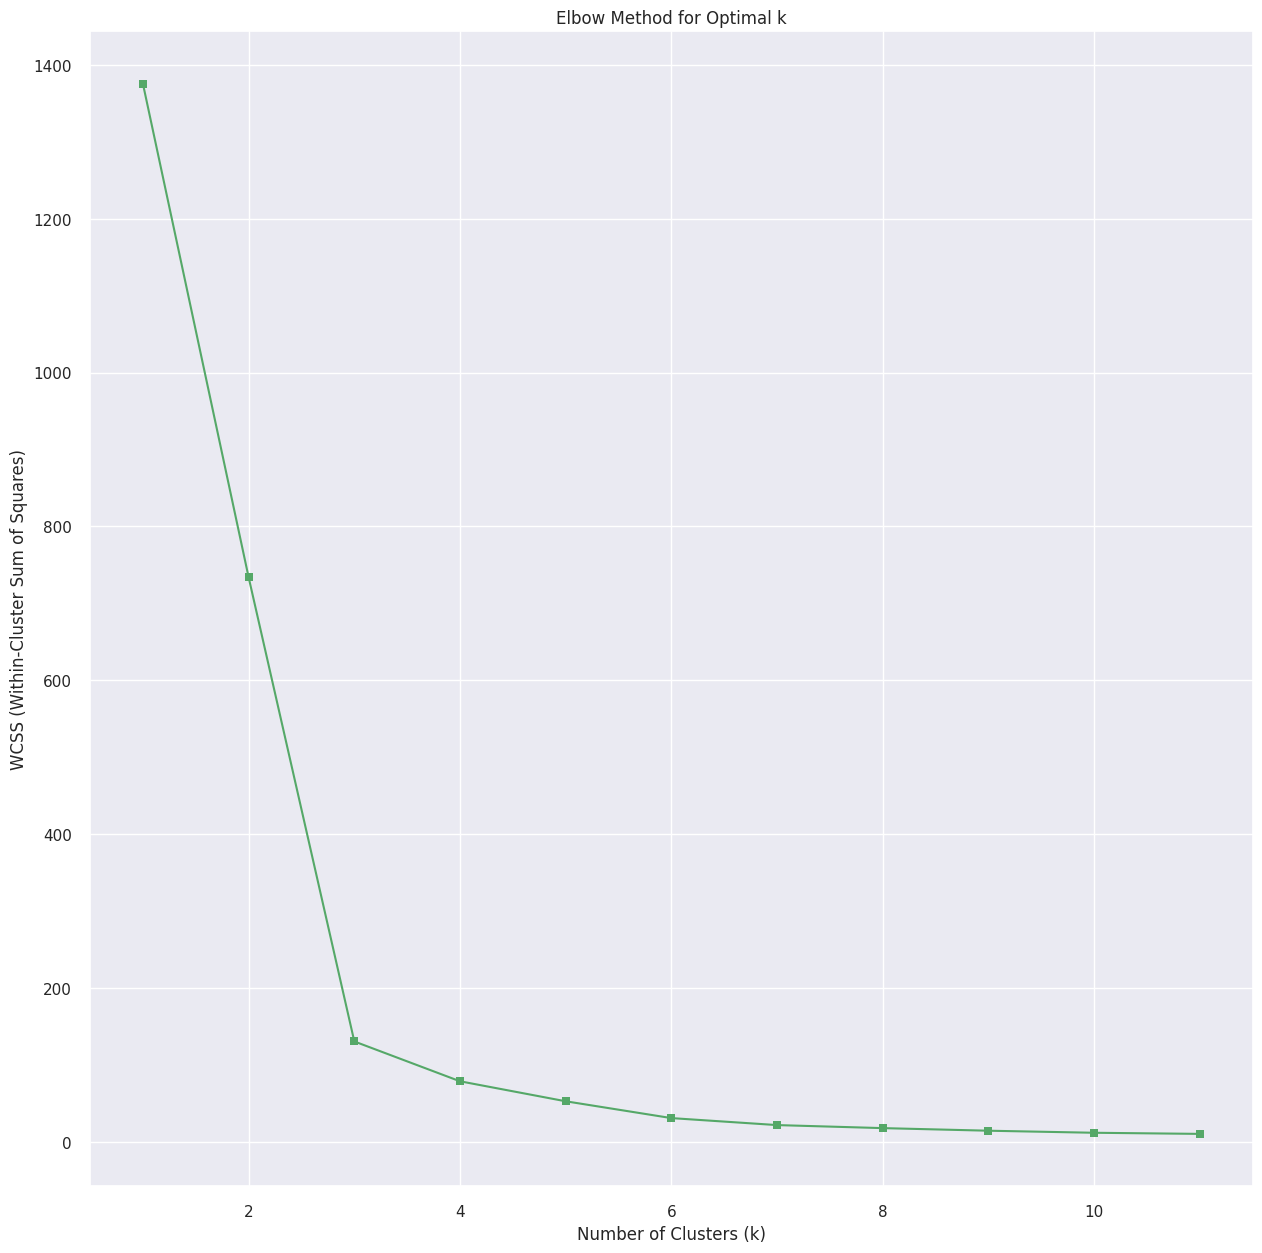

In [ ]:
plot_elbow_curve(X_reduced)

##### method2
Using the KElbowVisualizer from the yellowbrick library

In [ ]:
def plot_elbow_visualizer(X, k_range=(2, 11), random_state=42):
    """
    Plot the elbow visualizer for determining the optimal number of clusters (k) using k-means.

    Parameters:
    - X: Input data for clustering.
    - k_range: Range of values for k (default is (2, 10)).
    - random_state: Random seed for reproducibility (default is 42).

    Returns:
    None (displays the plot).
    """
    km = KMeans(random_state=random_state)
    visualizer = KElbowVisualizer(km, k=k_range)

    visualizer.fit(X)
    visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

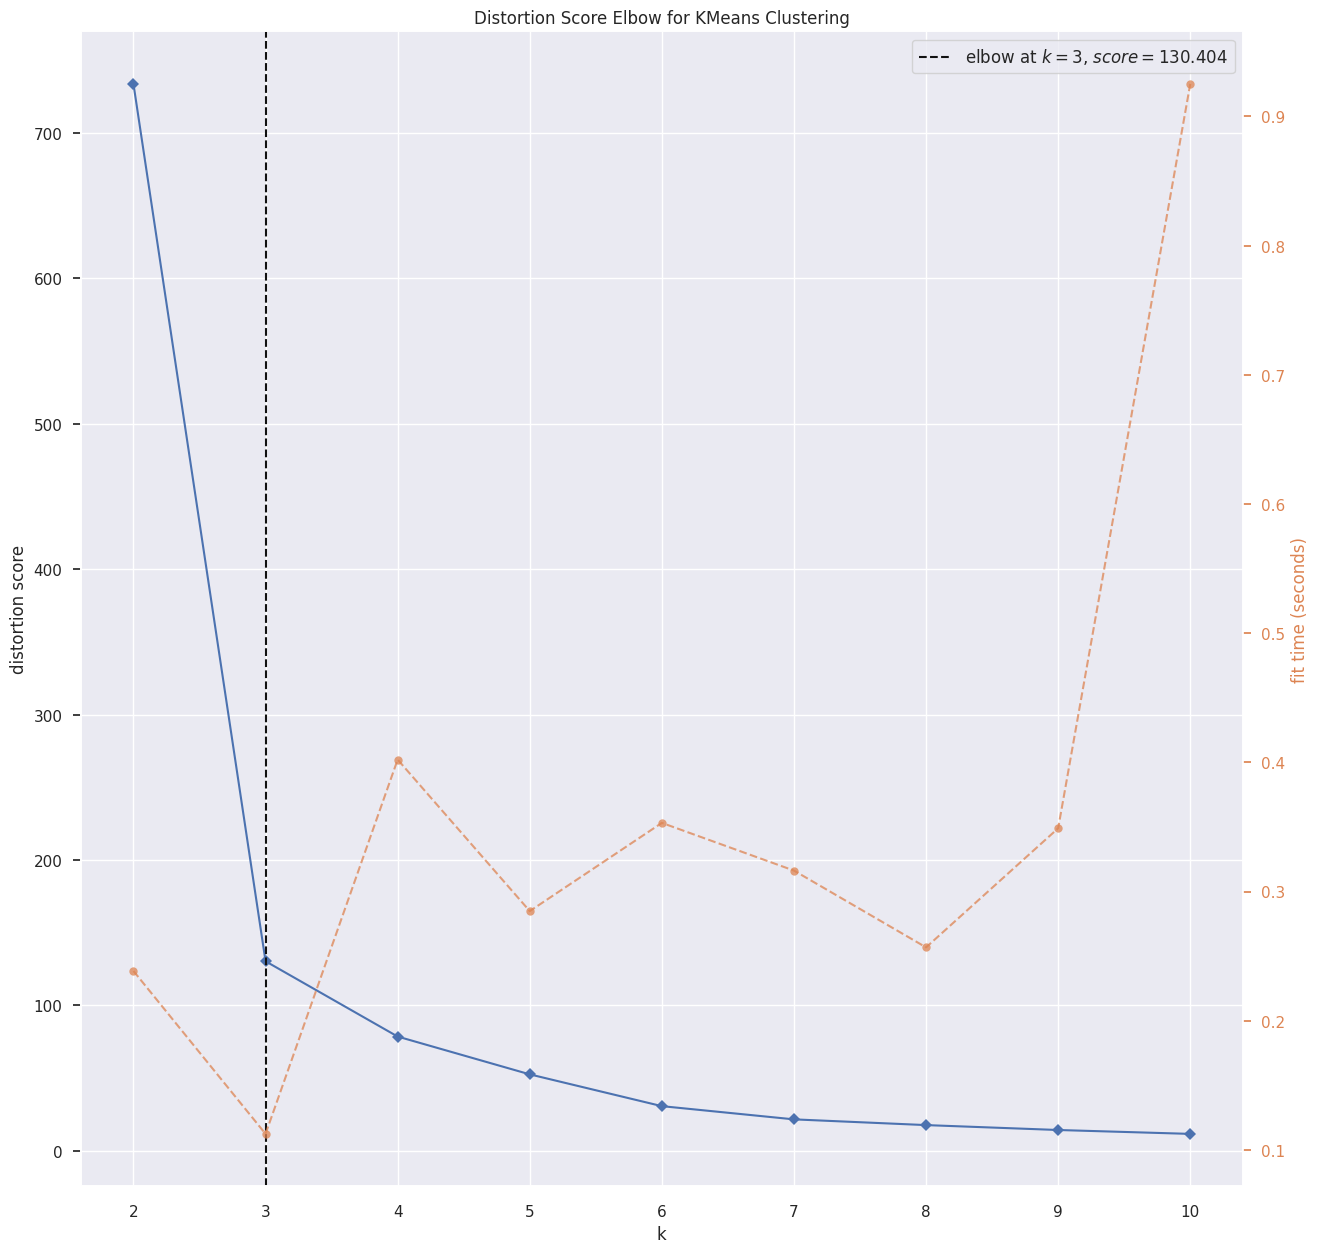

In [ ]:
plot_elbow_visualizer(X_reduced)

##### method3

calinski_harabasz

visualize the optimal number of clusters in a k-means clustering algorithm based on the Calinski-Harabasz Index. The Calinski-Harabasz Index is another metric used for evaluating the goodness of a clustering technique. It measures the ratio of the between-cluster variance to the within-cluster variance.

In [ ]:
def plot_elbow_visualizer_calinski(X, k_range=(3, 12), metric='calinski_harabasz', timings=False):
    """
    Plot the elbow visualizer using the Calinski-Harabasz index for determining the optimal number of clusters (k) using k-means.

    Parameters:
    - X: Input data for clustering.
    - k_range: Range of values for k (default is (3, 12)).
    - metric: Scoring metric for the Calinski-Harabasz index (default is 'calinski_harabasz').
    - timings: Whether to display the fit timings (default is False).

    Returns:
    None (displays the plot).
    """
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=k_range, metric=metric, timings=timings)

    visualizer.fit(X)
    visualizer.show()

In [ ]:
plot_elbow_visualizer_calinski(X_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

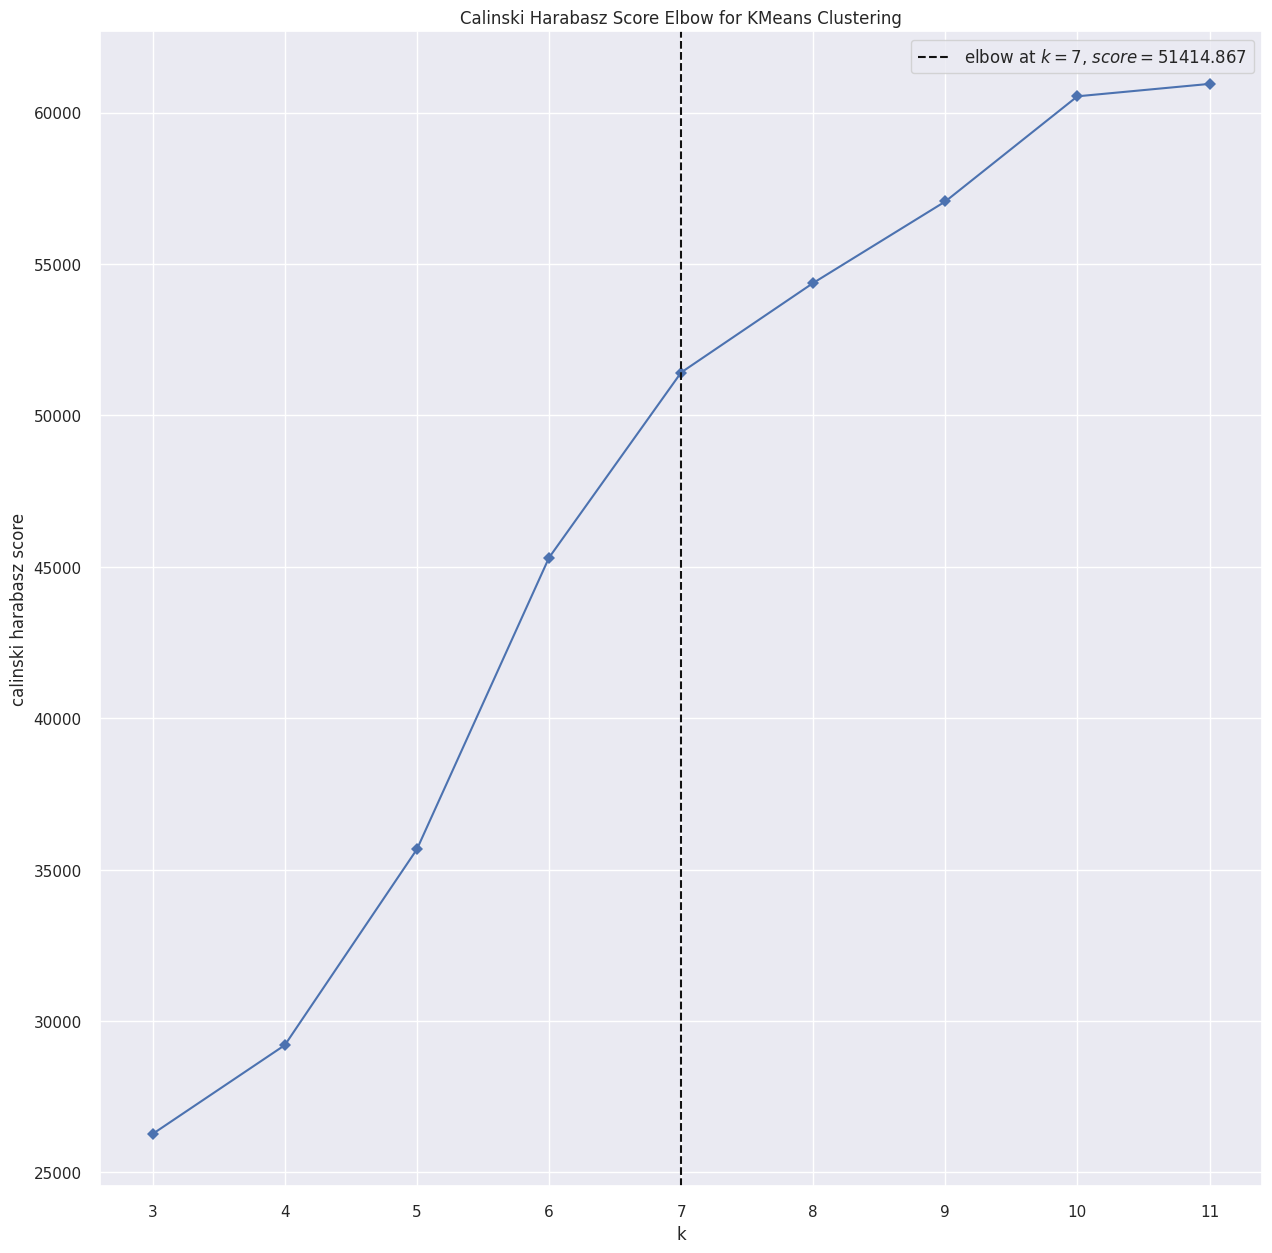

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

#### Silhouette


The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters

In [24]:
from sklearn.metrics import silhouette_score

In [20]:
def find_best_k_silhouette(X, k_range=(2, 13), random_state=42):
    """
    Find the optimal number of clusters (k) using silhouette score.

    Parameters:
    - X: Input data for clustering.
    - k_range: Range of values for k (default is (2, 13)).
    - random_state: Random seed for reproducibility (default is 42).

    Returns:
    - best_k: The optimal number of clusters based on silhouette score.
    """
    silhouette_scores = []

    for kv in range(*k_range):
        kmeans = KMeans(n_clusters=kv, random_state=random_state)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    best_k = k_range[0] + np.argmax(silhouette_scores)

    print(f"Best k: {best_k}")
    return best_k, silhouette_scores

In [21]:
best_k, silhouette_scores = find_best_k_silhouette(X_reduced, k_range=(2, 13), random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best k: 3


In [ ]:
silhouette_scores

[0.839613662304041,
 0.9063675566175831,
 0.8215014627748723,
 0.8286147977547205,
 0.8357999503691043,
 0.5910511450738186,
 0.5918119164243751,
 0.5922752339303026,
 0.5913795748242863,
 0.589658091229065,
 0.58786122724418]

### Run k-means

Now that we have an appropriate k value. we choose the k that get from The silhouette value in best_k,

we can run k-means on the reduced data.


In [25]:
k = best_k
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df_clean['y_tf_pca'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
22795  Prediction of COVID-19 Spreading Profiles in S...   
22796  A deterministic epidemic model for the emergen...   
22797  Data-driven discovery of clinical routes for s...   
22798  Ascertainment rate of novel coronavirus diseas...   
22799  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract  \
0      The geographic spread of 2019 novel coronaviru...   
1      In December 2019, cases of unidentified pneumo...   
2      The basic reproduction number of an infectious...   
3      The initial cluster of severe pneumonia cases ...   
4      Cruise ships carry a large number of people in...   
...                                                  ...   
22795  <jats:p>This work applies a data-driven coding...   
22796  <jats:p>Coronavirus disease (COVID-19) broke o...   
22797  <jats:p>The outbreak of COVID-19 epidemic has ...   
22798  <jats:p>We analyzed the epidemiological datase...   
22799  <jats:p>A novel human coronavirus, now named s...   

                                          Title&Abstract  \
0      ['incub', 'period', 'epidemiolog', 'characteri...   
1      ['characterist', 'public', 'health', 'respons'...   
2      ['updat', 'estim', 'risk', 'transmiss', 'novel...   
3      ['realtim', 'forecast', '2019ncov', 'epidem', ...   
4      ['covid19', 'outbreak', 'diamond', 'princess',...   
...                                                  ...   
22795  ['predict', 'covid19', 'spread', 'profil', 'so...   
22796  ['determinist', 'epidem', 'model', 'emerg', 'c...   
22797  ['datadriven', 'discoveri', 'clinic', 'rout', ...   
22798  ['ascertain', 'rate', 'novel', 'coronaviru', '...   
22799  ['aerosol', 'surfac', 'stabil', 'hcov19', 'sar...   

                                   string_Title&Abstract  \
0      incub period epidemiolog characterist novel co...   
1      characterist public health respons coronaviru ...   
2      updat estim risk transmiss novel coronaviru 20...   
3      realtim forecast 2019ncov epidem china februar...   
4      covid19 outbreak diamond princess cruis ship e...   
...                                                  ...   
22795  predict covid19 spread profil south korea ital...   
22796  determinist epidem model emerg covid19 china j...   
22797  datadriven discoveri clinic rout sever detect ...   
22798  ascertain rate novel coronaviru diseas covid19...   
22799  aerosol surfac stabil hcov19 sarscov2 compar s...   

       Title&Abstract_word_count  Abstract_unique_words language  y_tf_pca  
0                            114                    110       en         2  
1                            132                    150       en         1  
2                            148                    156       en         2  
3                            212                    204       en         2  
4                            175                    173       en         2  
...                          ...                    ...      ...       ...  
22795                        103                     97       en         2  
22796                         67                     80       en         2  
22797                         52                     57       en         1  
22798                         45                     53       en         2  
22799                         51                     61       en         2  

[22800 rows x 8 columns]

### Plot k-means

<ipython-input-163-da5aa3c911d7>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], palette=palette)


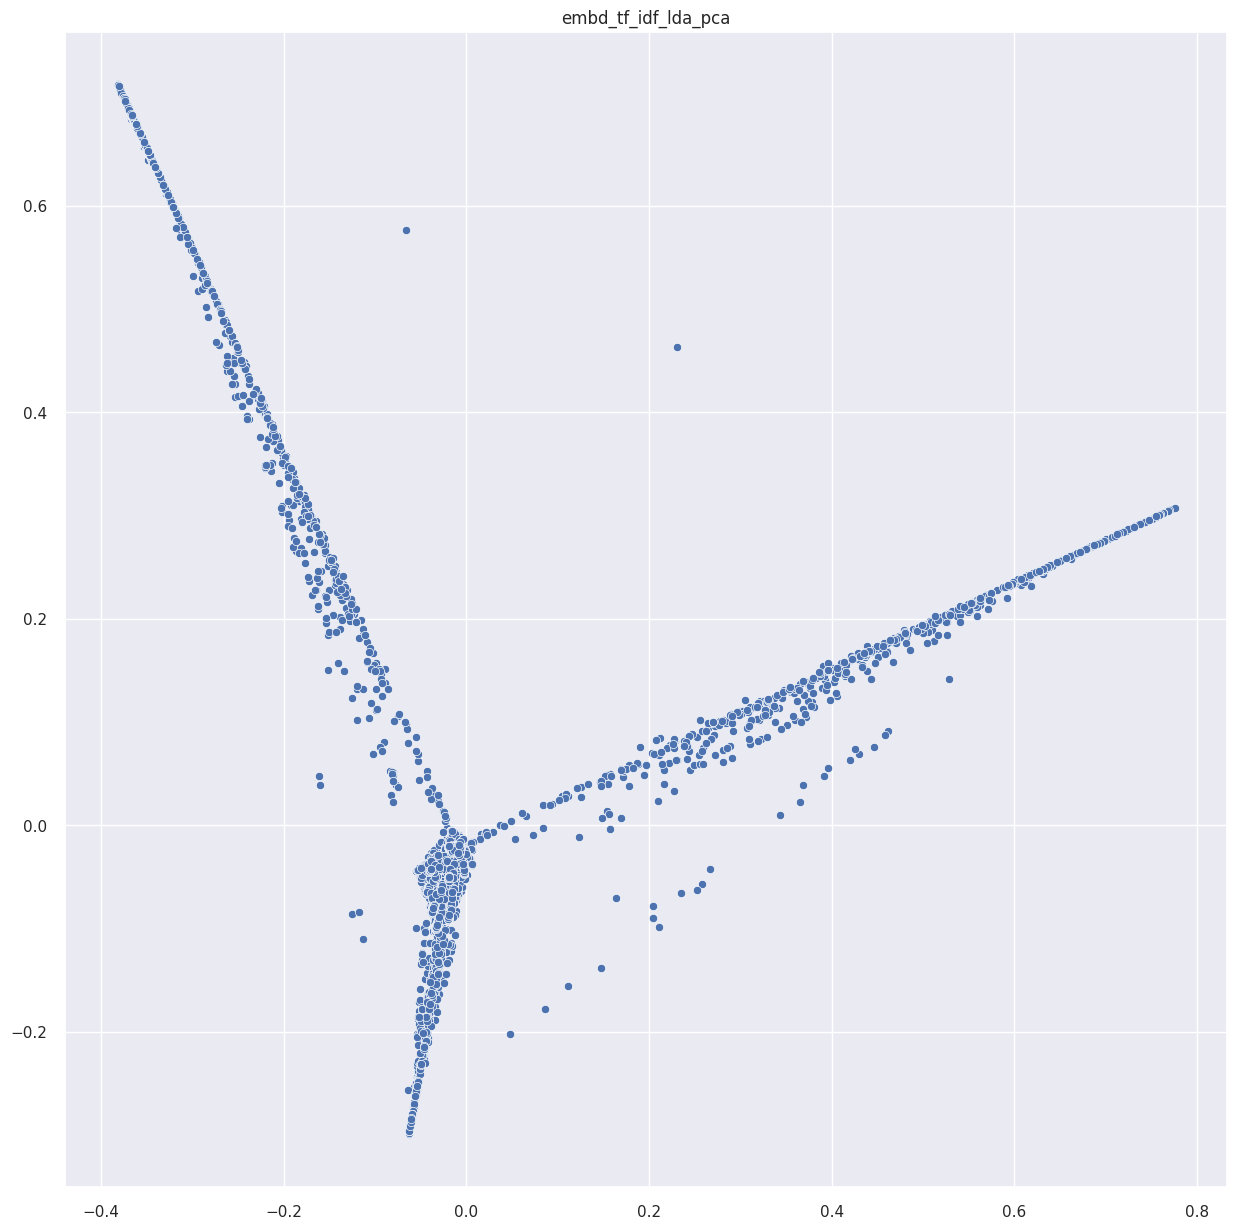

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], palette=palette)
plt.title(f'embd_tf_idf_lda_pca')
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

In [ ]:
k

10

<ipython-input-26-146d4161f5b7>:12: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y_pred, legend='full', palette=palette)


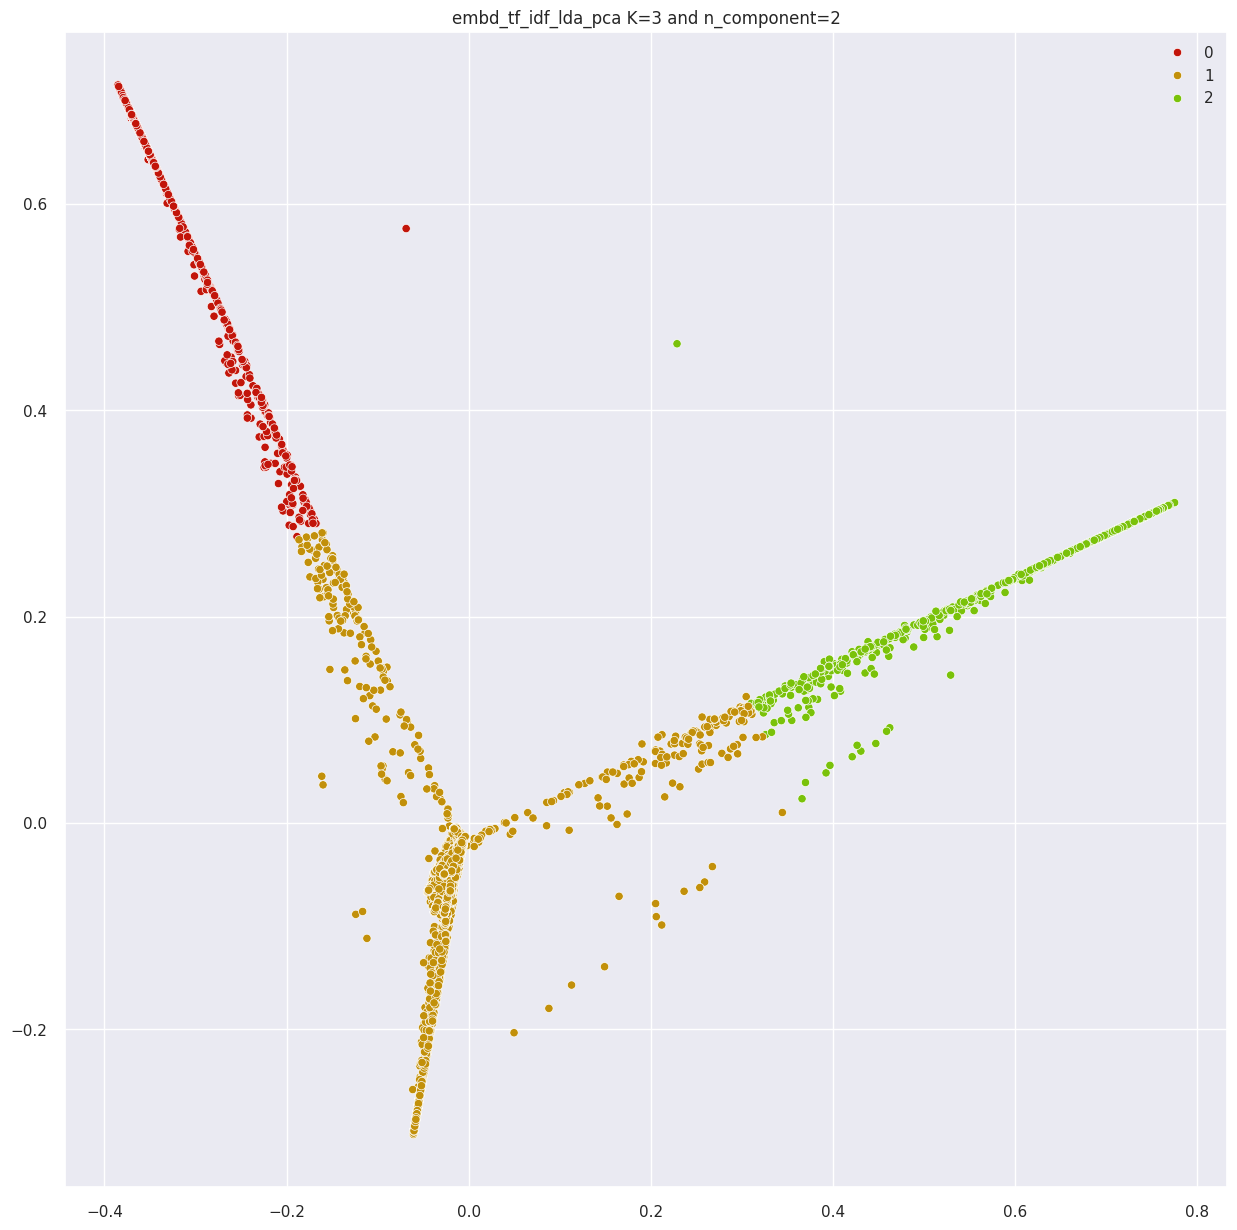

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(9, l=.4, s=.9)

# plot
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y_pred, legend='full', palette=palette)
plt.title(f'embd_tf_idf_lda_pca K={k} and n_component={2}')
plt.savefig("improved_cluster_bert&tsne.png")
plt.show()

In [ ]:
#plot method 2

In [ ]:
def plot_embeddings(embedding, labels,title):

    labels = np.array( labels )
    distinct_labels =  set( labels )

    n = len(embedding)
    counter = Counter(labels)
    for i in range(len( distinct_labels )):
        ratio = (counter[i] / n )* 100
        cluster_label = f"cluster {i}: { round(ratio,2)}"
        x = embedding[:, 0][labels == i]
        y = embedding[:, 1][labels == i]
        plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
    plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
    plt.title(title)


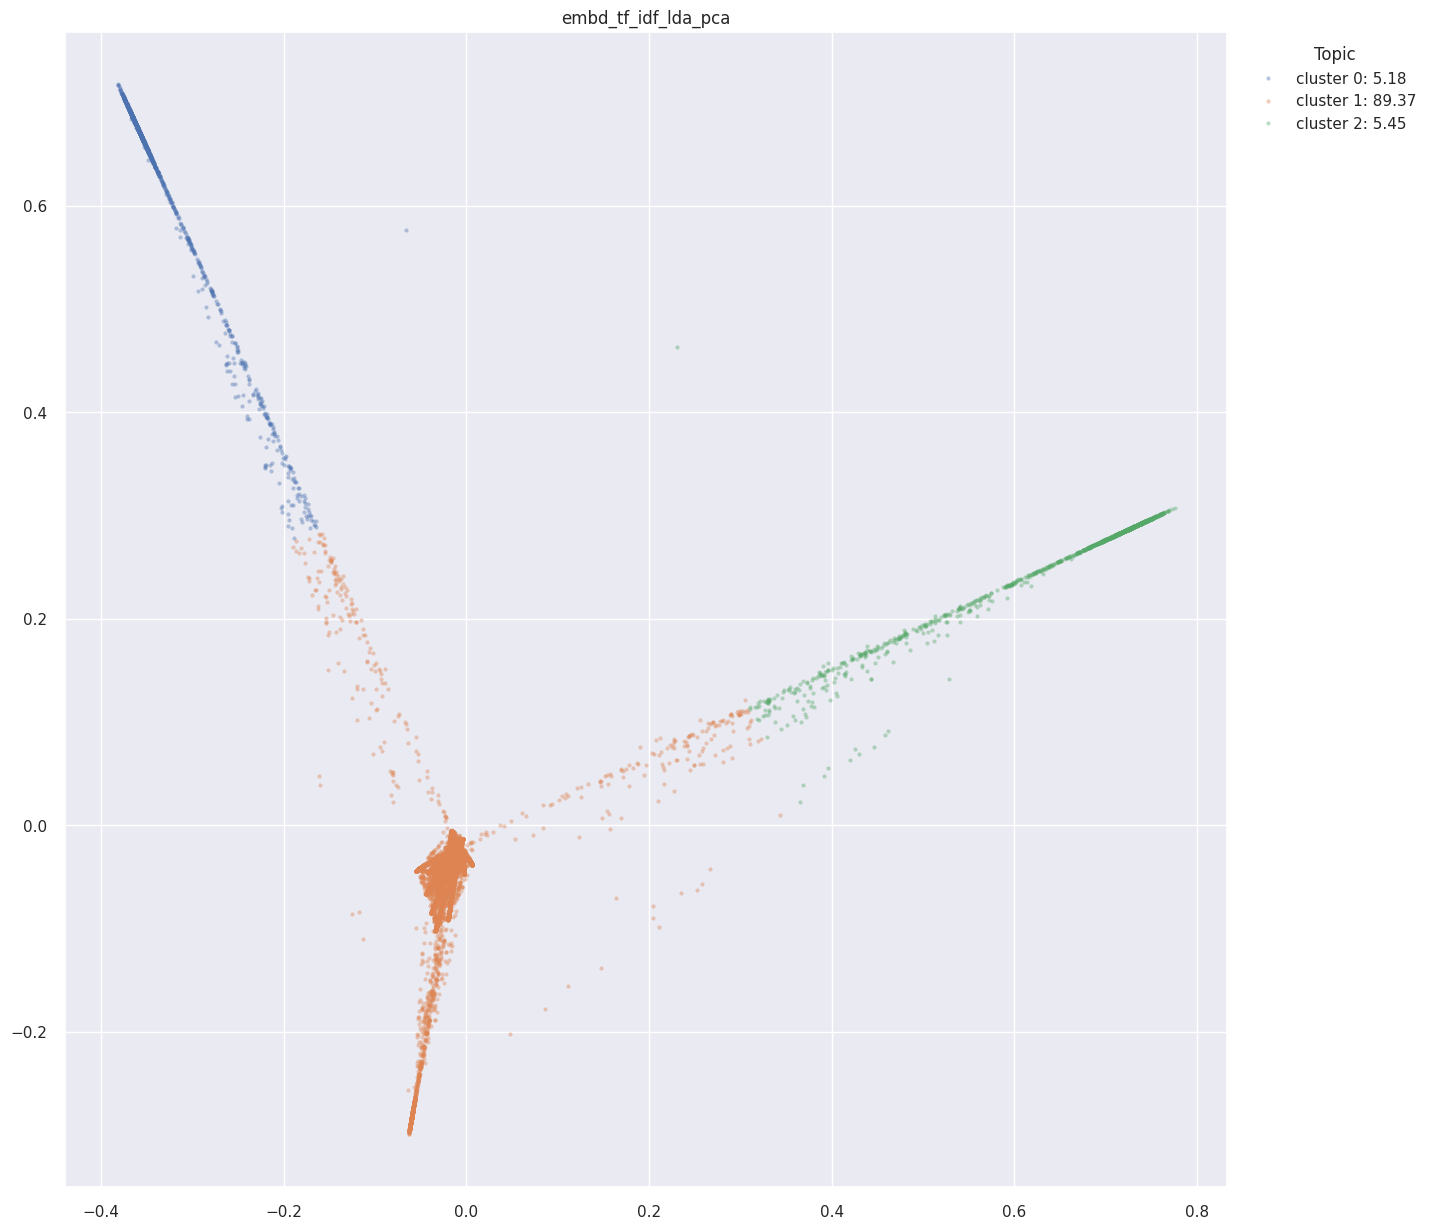

In [ ]:
plot_embeddings(embd_tf_idf_lda_pca,y_pred,"embd_tf_idf_lda_pca")

### analysis

#### silhouette_score

In [ ]:
silhouette_avg = silhouette_score(X_reduced, y_pred)
silhouette_avg

0.9063675566175831

#### davies_bouldin_score

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(embd_tf_idf_lda_pca, y_pred)

print(f"Davies–Bouldin index: {db_index}")

Davies–Bouldin index: 0.19922373674285676


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
def plot_cluster_silhouette(data, n_clusters, cluster_labels):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Clustering on sample data with # clusters = "
                  + str(n_clusters) + "\nAverage silhouette_score is : "
                  + str(silhouette_avg)))
    plt.show()

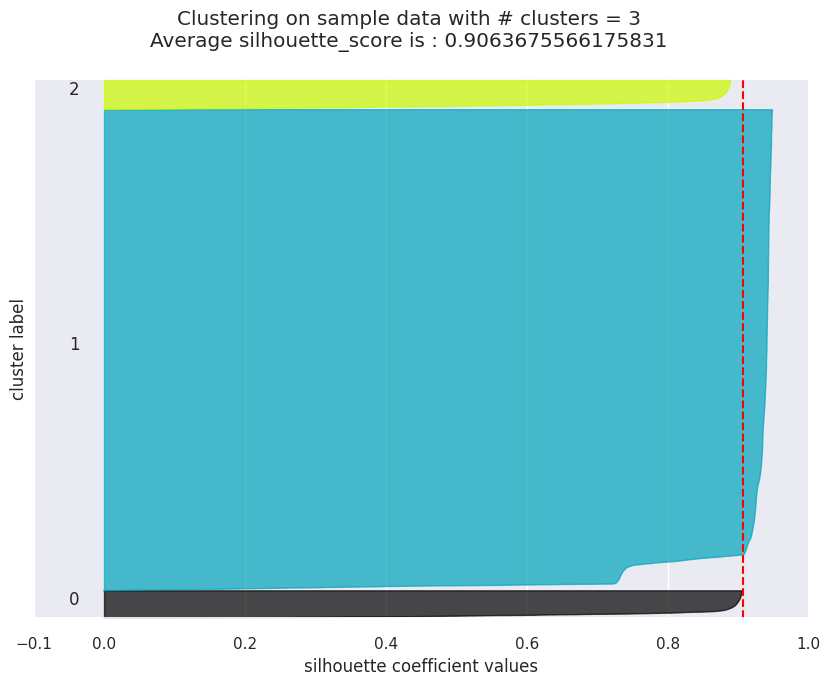

In [ ]:
plot_cluster_silhouette(X_reduced, k, y_pred)

#### **Representaion of each cluster**
In this part, we first find the repeated words in each cluster and then compare them with the topics obtained from lda in [Extract top words for each topic] section, and measure the similarity between them. It is the closest expression of the topic

In [27]:
from collections import Counter
import re

def get_word_frequencies(class_label):
    # Combine all text in the specified column into a single string
    cluster_text = ' '.join(df_clean[(df_clean['y_tf_pca'] == class_label)]['Title&Abstract'].astype(str).tolist())
    # Tokenize the text into words
    words = cluster_text.split()

    # Remove single quotes from each word
    words = [word.strip("',") for word in words]

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies



def get_sorted_word_frequencies(class_label):
    word_freq_dict = get_word_frequencies(class_label)
    sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True))
    return sorted_word_freq

In [28]:
def find_most_similar_list(word_freq, lists_of_words):
    # Function to calculate similarity based on frequencies
    def calculate_similarity(word_list):
        total_freq = sum(word_freq[word] for word in word_freq)
        intersection_freq = sum(word_freq[word] for word in word_list if word in word_freq)
        return intersection_freq / total_freq

    # Calculate similarity for each list of words
    similarities = [calculate_similarity(word_list) for word_list in lists_of_words]

    # Find the index of the list with the highest similarity
    most_similar_index = similarities.index(max(similarities))

    # Display results (optional)
    print("Similarities:", similarities)
    print("Most Similar List of Words:", lists_of_words[most_similar_index])

    # Return the most similar list and its index
    return lists_of_words[most_similar_index], most_similar_index

Topic 0: "Vaccine Protection and Immune Response in Mouse Models"

Topic 1: "Genomic Sequencing and Mutation Analysis of Viral RNA"

Topic 2: "SARS-CoV and Severe Respiratory Syndrome"

Topic 3: "Transcriptional Regulation and Protein Sequencing"

Topic 4: "Sensitive Diagnostic Assays for Viral Infections"

Topic 5: "Recombination, Genomic Surveillance, and Pandemic Preparedness"

Topic 6: "Antibody Neutralization and Vaccine Development"

Topic 7: "Epidemiological Models for Disease Spread and Control"

Topic 8: "Protein Structure, Binding, and Functional Domains"

Topic 9: "Genetic Analysis and Outbreak Identification of Viral Strains"

Topic 10: "Membrane Fusion and Viral Entry Mechanisms"

Topic 11: "Respiratory Tissue Response to Influenza Infection"

Topic 12: "Vaccine Development Strategies and Immune System Activation"

Topic 13: "Cellular Response and Inhibition of Viral Infections"

Topic 14: "Respiratory Viruses, Immune Response, and Pathogenesis"

Topic 15: "Emergence and Spread of Novel Coronaviruses in China"

Topic 16: "Pediatric Respiratory Infections and Hospitalization"

Topic 17: "Antiviral Agents and Inhibition of Influenza"

Topic 18: "Patient Serum Levels and Disease Association"

Topic 19: "Peptide Therapeutics for Targeted Viral Inhibition"

Topic 20: "Host-Pathogen Interactions and Cellular Signaling"

Topic 21: "Hepatic Infection Models and Viral Replication"

Topic 22: "Viral Receptor Binding, Mutations, and Entry"

Topic 23: "Respiratory Syndrome Patients and Hospital Care"

Topic 24: "Antiviral Drugs and Therapeutic Targets"

Topic 25: "Animal Models for Infectious Diseases and Pathogens"

Topic 26: "MERS-CoV and Respiratory Syndrome in Humans"

Topic 27: "Immunological Response and System Function"

Topic 28: "Biological Predictions and Methods for Genomic Analysis"

Topic 29: "Clinical Presentation and Detection of Respiratory Infections"

Topic 30: "Pandemic Influenza, Public Health, and Risk Management"

Topic 31: "Gene Expression Analysis and Immune Responses"

Topic 32: "Clinical Diagnosis and Severity of Respiratory Infections"

Topic 33: "Bat Viruses, Host Transmission, and Emerging Pathogens"

Topic 34: "Sample Collection, Detection, and Identification of Viruses"

Topic 35: "Effect of Treatment and Control Measures on Patient Outcomes"

Topic 36: "Global Health Research and Surveillance"

Topic 37: "Interferon Response and Immune Activation"

Topic 38: "Virus Replication Inhibition and Cellular Responses"

Topic 39: "Type of Treatment and Efficient Infection Control"

In [29]:
def get_topic_name(index):
    topic_names = [
        "Vaccine Protection and Immune Response in Mouse Models",
        "Genomic Sequencing and Mutation Analysis of Viral RNA",
        "SARS-CoV and Severe Respiratory Syndrome",
        "Transcriptional Regulation and Protein Sequencing",
        "Sensitive Diagnostic Assays for Viral Infections",
        "Recombination, Genomic Surveillance, and Pandemic Preparedness",
        "Antibody Neutralization and Vaccine Development",
        "Epidemiological Models for Disease Spread and Control",
        "Protein Structure, Binding, and Functional Domains",
        "Genetic Analysis and Outbreak Identification of Viral Strains",
        "Membrane Fusion and Viral Entry Mechanisms",
        "Respiratory Tissue Response to Influenza Infection",
        "Vaccine Development Strategies and Immune System Activation",
        "Cellular Response and Inhibition of Viral Infections",
        "Respiratory Viruses, Immune Response, and Pathogenesis",
        "Emergence and Spread of Novel Coronaviruses in China",
        "Pediatric Respiratory Infections and Hospitalization",
        "Antiviral Agents and Inhibition of Influenza",
        "Patient Serum Levels and Disease Association",
        "Peptide Therapeutics for Targeted Viral Inhibition",
        "Host-Pathogen Interactions and Cellular Signaling",
        "Hepatic Infection Models and Viral Replication",
        "Viral Receptor Binding, Mutations, and Entry",
        "Respiratory Syndrome Patients and Hospital Care",
        "Antiviral Drugs and Therapeutic Targets",
        "Animal Models for Infectious Diseases and Pathogens",
        "MERS-CoV and Respiratory Syndrome in Humans",
        "Immunological Response and System Function",
        "Biological Predictions and Methods for Genomic Analysis",
        "Clinical Presentation and Detection of Respiratory Infections",
        "Pandemic Influenza, Public Health, and Risk Management",
        "Gene Expression Analysis and Immune Responses",
        "Clinical Diagnosis and Severity of Respiratory Infections",
        "Bat Viruses, Host Transmission, and Emerging Pathogens",
        "Sample Collection, Detection, and Identification of Viruses",
        "Effect of Treatment and Control Measures on Patient Outcomes",
        "Global Health Research and Surveillance",
        "Interferon Response and Immune Activation",
        "Virus Replication Inhibition and Cellular Responses",
        "Type of Treatment and Efficient Infection Control"
    ]

    if 0 <= index < len(topic_names):
        return topic_names[index]
    else:
        return "Invalid Index"

In [31]:
def analyze_and_display_similarity(class_label, top_words):
    sorted_new_vocab = get_sorted_word_frequencies(class_label)

    most_similar_list, most_similar_index = find_most_similar_list(sorted_new_vocab, top_words_tfidf)
    max_similarity = max(most_similar_list)

    # Display results
    print("Maximum Similarity:", max_similarity)
    print("Index of Maximum Similarity:", most_similar_index)

    # Access the top words for the most similar list
    top_words_tfidf[most_similar_index]

    topic_name = get_topic_name(most_similar_index)
    print(f"Topic {most_similar_index}: {topic_name}")
    return sorted_new_vocab

most_similar_list0 = analyze_and_display_similarity(0, top_words_tfidf)
most_similar_list1 = analyze_and_display_similarity(1, top_words_tfidf)
most_similar_list2 = analyze_and_display_similarity(2, top_words_tfidf)

Similarities: [0.06928021771771772, 0.12430203641141141, 0.08918097785285285, 0.10663593280780781, 0.029877533783783782, 0.12949277402402404, 0.06684027777777778, 0.022786458333333332, 0.09605503941441441, 0.039707676426426426, 0.09859468843843844, 0.06827726163663664, 0.01972480292792793, 0.07769683746246246, 0.07225975975975976, 0.03083356794294294, 0.04749671546546547, 0.069409253003003, 0.03157258821321322, 0.0712450731981982, 0.13341661974474475, 0.07429499812312312, 0.08366178678678679, 0.02246387012012012, 0.04290423235735736, 0.036036036036036036, 0.08777918543543543, 0.0740134665915916, 0.058265296546546545, 0.08122184684684684, 0.01444022147147147, 0.17521818693693694, 0.02633492867867868, 0.022065033783783782, 0.06429476351351351, 0.03937922297297297, 0.01707957957957958, 0.0997266798048048, 0.0947412256006006, 0.06485196133633633]
Most Similar List of Words: ['rna', 'mrna', 'replic', 'protein', 'viru', 'genom', 'sequenc', 'transcript', 'viral', 'structur', 'gene', 'site', '

##### word cloud

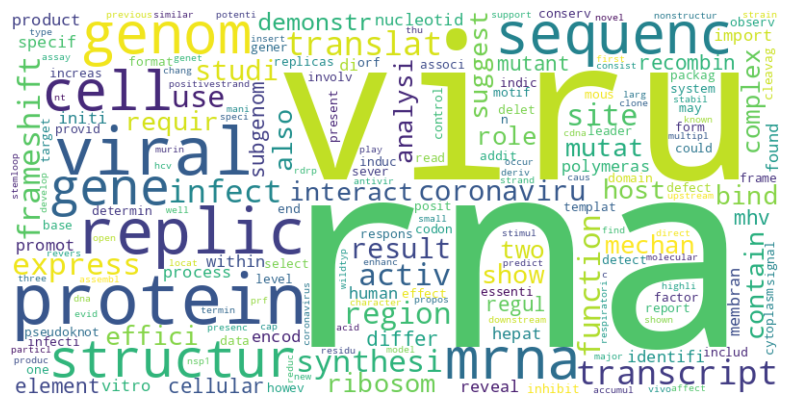

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list0

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

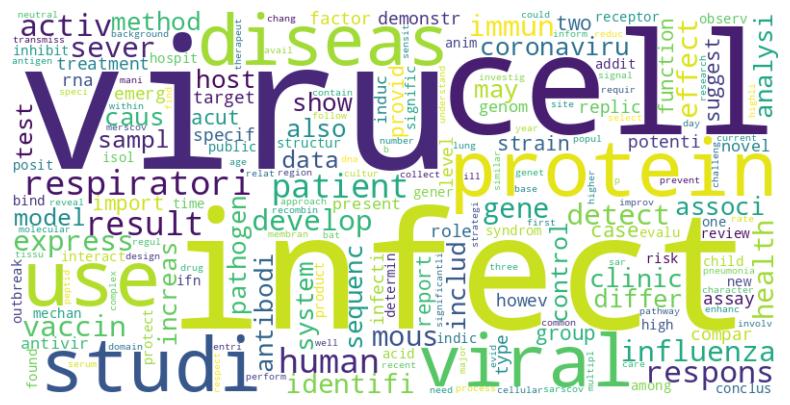

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

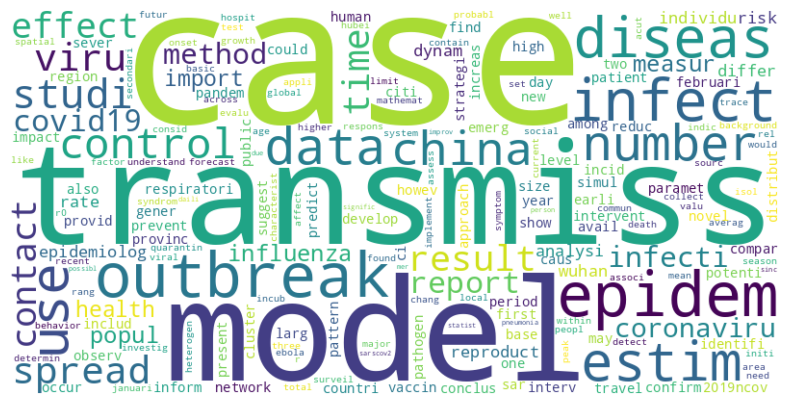

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list2

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## MeanShift

In [36]:
from sklearn.cluster import MeanShift
MeanShift_clustering = MeanShift(bandwidth=0.5)
y_pred_shift = MeanShift_clustering.fit_predict(embd_tf_idf_lda_pca)
np.unique(y_pred_shift)
df_clean['y_pred_shift'] = y_pred_shift

#### silhouette_score

In [37]:
silhouette_avg = silhouette_score(embd_tf_idf_lda_pca, y_pred_shift)
silhouette_avg

0.9090980576225434

### davies_bouldin_score

In [39]:
from sklearn.metrics import davies_bouldin_score

In [41]:
# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(embd_tf_idf_lda_pca, y_pred_shift)

print(f"Davies–Bouldin index: {db_index}")

Davies–Bouldin index: 0.20971302641222944


### plot

<ipython-input-44-5822fffa7948>:12: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=embd_tf_idf_lda_pca[:,0], y=embd_tf_idf_lda_pca[:,1], hue=y_pred_shift, legend='full', palette=palette)


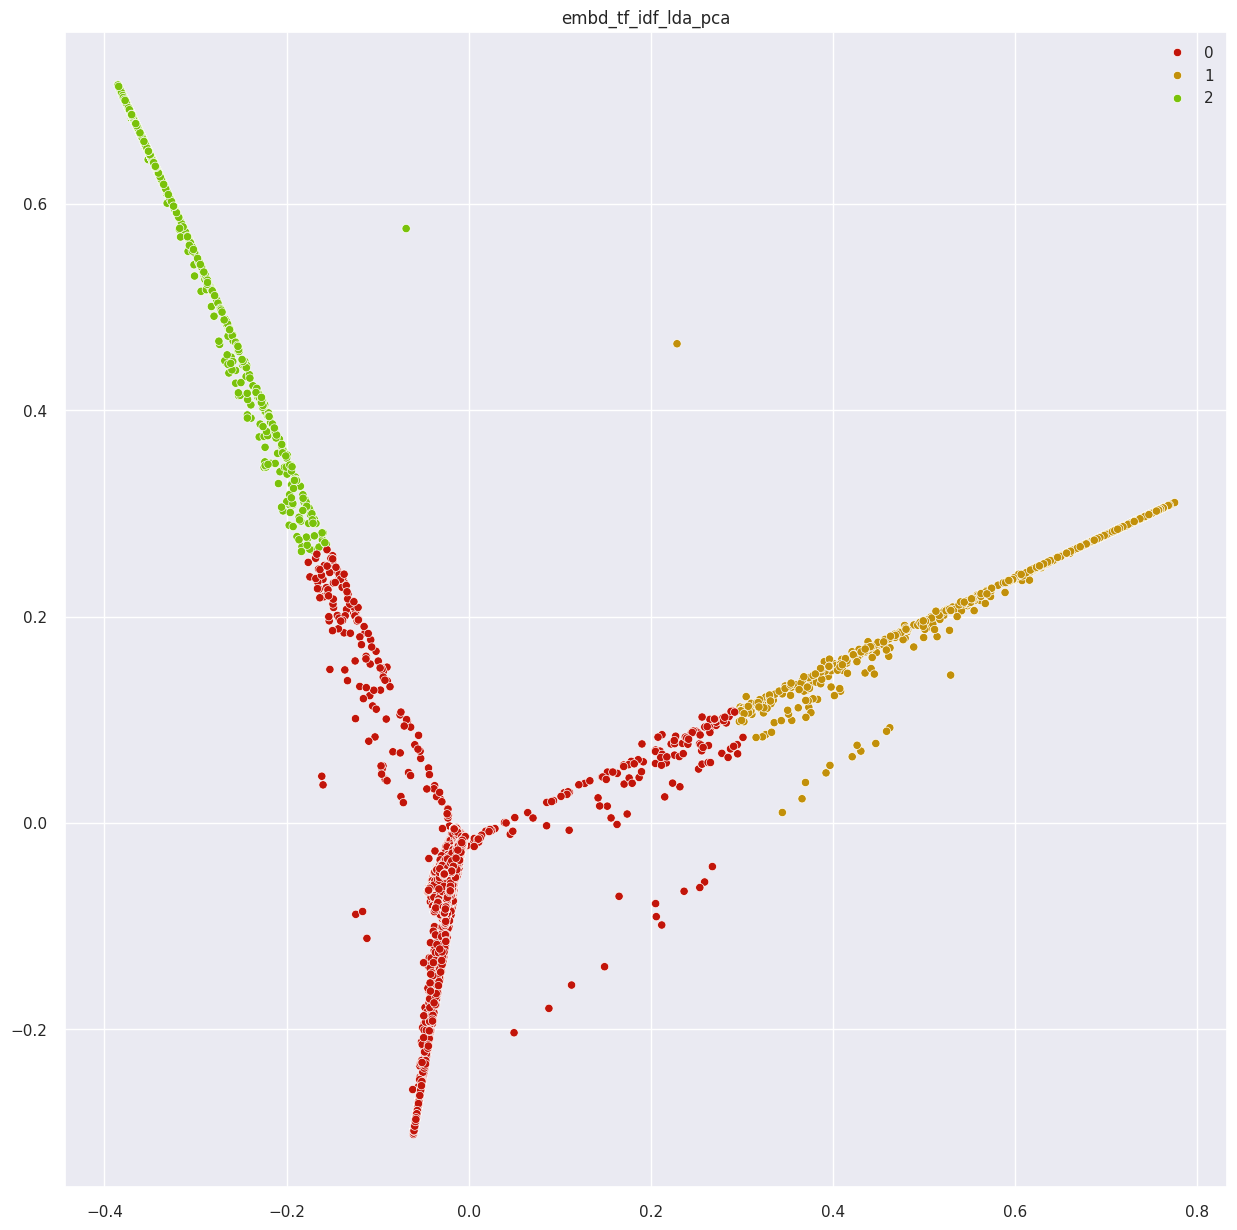

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(9, l=.4, s=.9)

# plot
sns.scatterplot(x=embd_tf_idf_lda_pca[:,0], y=embd_tf_idf_lda_pca[:,1], hue=y_pred_shift, legend='full', palette=palette)
plt.title('embd_tf_idf_lda_pca')
plt.savefig("embd_tf_idf_lda_pca.png")
plt.show()

### analysis

#### **Representaion of each cluster**
In this part, we first find the repeated words in each cluster and then compare them with the topics obtained from lda in [Extract top words for each topic] section, and measure the similarity between them. It is the closest expression of the topic

In [45]:
from collections import Counter
import re

def get_word_frequencies(class_label):
    # Combine all text in the specified column into a single string
    cluster_text = ' '.join(df_clean[(df_clean['y_pred_shift'] == class_label)]['Title&Abstract'].astype(str).tolist())
    # Tokenize the text into words
    words = cluster_text.split()

    # Remove single quotes from each word
    words = [word.strip("',") for word in words]

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies



def get_sorted_word_frequencies(class_label):
    word_freq_dict = get_word_frequencies(class_label)
    sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True))
    return sorted_word_freq

In [46]:
def find_most_similar_list(word_freq, lists_of_words):
    # Function to calculate similarity based on frequencies
    def calculate_similarity(word_list):
        total_freq = sum(word_freq[word] for word in word_freq)
        intersection_freq = sum(word_freq[word] for word in word_list if word in word_freq)
        return intersection_freq / total_freq

    # Calculate similarity for each list of words
    similarities = [calculate_similarity(word_list) for word_list in lists_of_words]

    # Find the index of the list with the highest similarity
    most_similar_index = similarities.index(max(similarities))

    # Display results (optional)
    print("Similarities:", similarities)
    print("Most Similar List of Words:", lists_of_words[most_similar_index])

    # Return the most similar list and its index
    return lists_of_words[most_similar_index], most_similar_index

In [47]:
def get_topic_name(index):
    topic_names = [
        "Vaccine Protection and Immune Response in Mouse Models",
        "Genomic Sequencing and Mutation Analysis of Viral RNA",
        "SARS-CoV and Severe Respiratory Syndrome",
        "Transcriptional Regulation and Protein Sequencing",
        "Sensitive Diagnostic Assays for Viral Infections",
        "Recombination, Genomic Surveillance, and Pandemic Preparedness",
        "Antibody Neutralization and Vaccine Development",
        "Epidemiological Models for Disease Spread and Control",
        "Protein Structure, Binding, and Functional Domains",
        "Genetic Analysis and Outbreak Identification of Viral Strains",
        "Membrane Fusion and Viral Entry Mechanisms",
        "Respiratory Tissue Response to Influenza Infection",
        "Vaccine Development Strategies and Immune System Activation",
        "Cellular Response and Inhibition of Viral Infections",
        "Respiratory Viruses, Immune Response, and Pathogenesis",
        "Emergence and Spread of Novel Coronaviruses in China",
        "Pediatric Respiratory Infections and Hospitalization",
        "Antiviral Agents and Inhibition of Influenza",
        "Patient Serum Levels and Disease Association",
        "Peptide Therapeutics for Targeted Viral Inhibition",
        "Host-Pathogen Interactions and Cellular Signaling",
        "Hepatic Infection Models and Viral Replication",
        "Viral Receptor Binding, Mutations, and Entry",
        "Respiratory Syndrome Patients and Hospital Care",
        "Antiviral Drugs and Therapeutic Targets",
        "Animal Models for Infectious Diseases and Pathogens",
        "MERS-CoV and Respiratory Syndrome in Humans",
        "Immunological Response and System Function",
        "Biological Predictions and Methods for Genomic Analysis",
        "Clinical Presentation and Detection of Respiratory Infections",
        "Pandemic Influenza, Public Health, and Risk Management",
        "Gene Expression Analysis and Immune Responses",
        "Clinical Diagnosis and Severity of Respiratory Infections",
        "Bat Viruses, Host Transmission, and Emerging Pathogens",
        "Sample Collection, Detection, and Identification of Viruses",
        "Effect of Treatment and Control Measures on Patient Outcomes",
        "Global Health Research and Surveillance",
        "Interferon Response and Immune Activation",
        "Virus Replication Inhibition and Cellular Responses",
        "Type of Treatment and Efficient Infection Control"
    ]

    if 0 <= index < len(topic_names):
        return topic_names[index]
    else:
        return "Invalid Index"

In [48]:
def analyze_and_display_similarity(class_label, top_words):
    sorted_new_vocab = get_sorted_word_frequencies(class_label)

    most_similar_list, most_similar_index = find_most_similar_list(sorted_new_vocab, top_words_tfidf)
    max_similarity = max(most_similar_list)

    # Display results
    print("Maximum Similarity:", max_similarity)
    print("Index of Maximum Similarity:", most_similar_index)

    # Access the top words for the most similar list
    top_words_tfidf[most_similar_index]

    topic_name = get_topic_name(most_similar_index)
    print(f"Topic {most_similar_index}: {topic_name}")
    return sorted_new_vocab

# most_similar_list0 = analyze_and_display_similarity(-1, top_words_tfidf)
most_similar_list1 = analyze_and_display_similarity(0, top_words_tfidf)
most_similar_list2 = analyze_and_display_similarity(1, top_words_tfidf)
most_similar_list3 = analyze_and_display_similarity(2, top_words_tfidf)

Similarities: [0.0833350975020782, 0.06415928891297568, 0.07127312295973885, 0.07555158499976714, 0.06309725932857149, 0.06860640548501233, 0.08050995767406348, 0.04484269965803353, 0.08489744534252394, 0.07162913221245108, 0.055085463390675875, 0.08734258322289637, 0.0490520062832634, 0.07910426801816106, 0.08179815369155838, 0.050407946380560835, 0.07472136718843722, 0.0663630885090516, 0.06018673373330567, 0.06019414324203407, 0.059164221528786295, 0.06971359778928486, 0.08279173352866209, 0.05686656815548395, 0.07008583739444979, 0.04089801834453228, 0.06232455341832393, 0.07583561616768918, 0.04703520857414237, 0.06457810257300484, 0.04310322927560409, 0.06179212729112595, 0.05206132532824124, 0.04271158381424573, 0.08291734234329595, 0.05958515219130928, 0.04645303288833941, 0.07885975423012381, 0.07456259200140004, 0.05025516936725618]
Most Similar List of Words: ['lung', 'infect', 'cell', 'respiratori', 'mous', 'acut', 'respons', 'tissu', 'diseas', 'sever', 'viru', 'immun', 'ex

##### word cloud

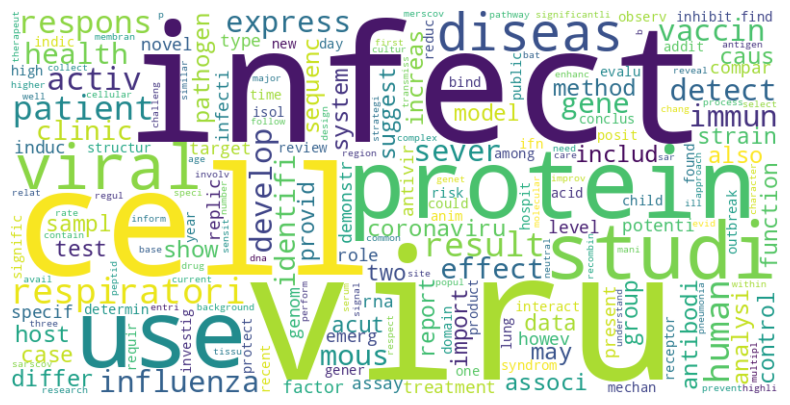

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


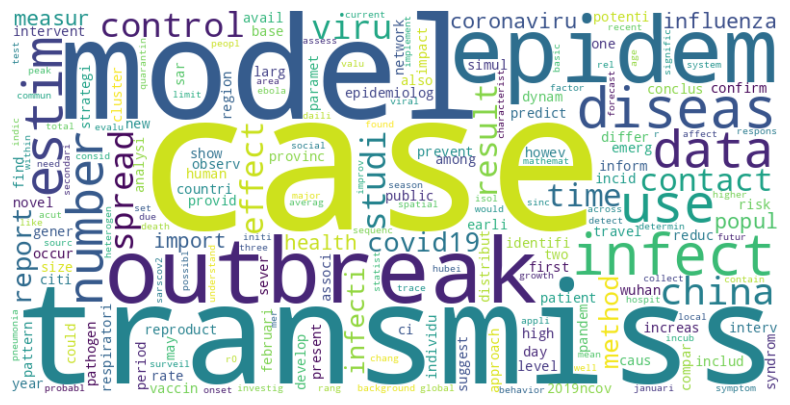

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list2

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

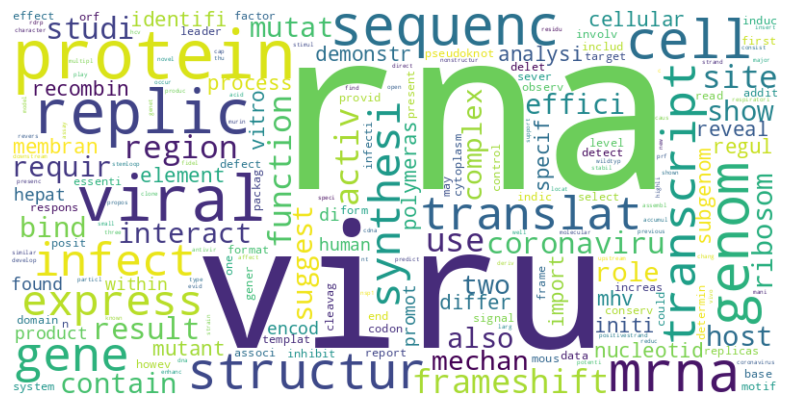

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list3

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
22804  Prediction of COVID-19 Spreading Profiles in S...   
22805  A deterministic epidemic model for the emergen...   
22806  Data-driven discovery of clinical routes for s...   
22807  Ascertainment rate of novel coronavirus diseas...   
22808  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
22804  <jats:p>This work applies a data-driven coding...   2020-03-10   
22805  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
22806  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
22807  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
22808  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  y_DB_umap  y_DB_pca  
0      ['incub', 'period', 'epidemiolog', 'characteri...          0         0  
1      ['characterist', 'public', 'health', 'respons'...          0         0  
2      ['updat', 'estim', 'risk', 'transmiss', 'novel...          1         0  
3      ['realtim', 'forecast', '2019ncov', 'epidem', ...          1         0  
4      ['covid19', 'outbreak', 'diamond', 'princess',...          1         0  
...                                                  ...        ...       ...  
22804  ['predict', 'covid19', 'spread', 'profil', 'so...          0         0  
22805  ['determinist', 'epidem', 'model', 'emerg', 'c...          0         0  
22806  ['datadriven', 'discoveri', 'clinic', 'rout', ...          0         0  
22807  ['ascertain', 'rate', 'novel', 'coronaviru', '...         17         0  
22808  ['aerosol', 'surfac', 'stabil', 'hcov19', 'sar...          0         0  

[22809 rows x 6 columns]

## DB Scan

In [ ]:
df_clean2 = df_clean.copy()

In [63]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
def apply_dbscan(data,column_name, eps=0.3, min_samples=4):
    """
    Apply DBSCAN clustering to the given data.

    Parameters:
    - data: The input data for DBSCAN.
    - eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other (default is 0.3).
    - min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point (default is 4).
    - column_name: The name of the column to store the cluster labels (default is 'y_DB_umap').

    Returns:
    - data: The input data with an additional column for DBSCAN cluster labels.
    """
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred_DB = db.fit_predict(data)
    df_clean[column_name] = y_pred_DB
    print(np.unique(y_pred_DB))
    return df_clean,y_pred_DB

col_name='y_DB_pca'
df_clean, y_pred_DB = apply_dbscan(embd_tf_idf_lda_pca, column_name=col_name, eps=0.02, min_samples=2)

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
22804  Prediction of COVID-19 Spreading Profiles in S...   
22805  A deterministic epidemic model for the emergen...   
22806  Data-driven discovery of clinical routes for s...   
22807  Ascertainment rate of novel coronavirus diseas...   
22808  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
22804  <jats:p>This work applies a data-driven coding...   2020-03-10   
22805  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
22806  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
22807  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
22808  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  y_DB_umap  y_DB_pca  
0      ['incub', 'period', 'epidemiolog', 'characteri...          0         0  
1      ['characterist', 'public', 'health', 'respons'...          0         0  
2      ['updat', 'estim', 'risk', 'transmiss', 'novel...          1         0  
3      ['realtim', 'forecast', '2019ncov', 'epidem', ...          1         0  
4      ['covid19', 'outbreak', 'diamond', 'princess',...          1         0  
...                                                  ...        ...       ...  
22804  ['predict', 'covid19', 'spread', 'profil', 'so...          0         0  
22805  ['determinist', 'epidem', 'model', 'emerg', 'c...          0         0  
22806  ['datadriven', 'discoveri', 'clinic', 'rout', ...          0         0  
22807  ['ascertain', 'rate', 'novel', 'coronaviru', '...         17         0  
22808  ['aerosol', 'surfac', 'stabil', 'hcov19', 'sar...          0         0  

[22809 rows x 6 columns]

In [59]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(y_pred_DB)) - (1 if -1 in y_pred_DB else 0)
n_noise_ = list(y_pred_DB).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 12
Estimated number of noise points: 12


#### silhouette_score

In [64]:
silhouette_avg = silhouette_score(embd_tf_idf_lda_pca, y_pred_DB)
silhouette_avg

0.024218767843338863

### davies_bouldin_score

In [65]:
from sklearn.metrics import davies_bouldin_score

In [66]:
# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(embd_tf_idf_lda_pca, y_pred_DB)

print(f"Davies–Bouldin index: {db_index}")

Davies–Bouldin index: 1.5156033991559954


### plot

<ipython-input-67-5098200a4f43>:12: UserWarning: 
The palette list has fewer values (9) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=embd_tf_idf_lda_pca[:,0], y=embd_tf_idf_lda_pca[:,1], hue=y_pred_DB, legend='full', palette=palette)


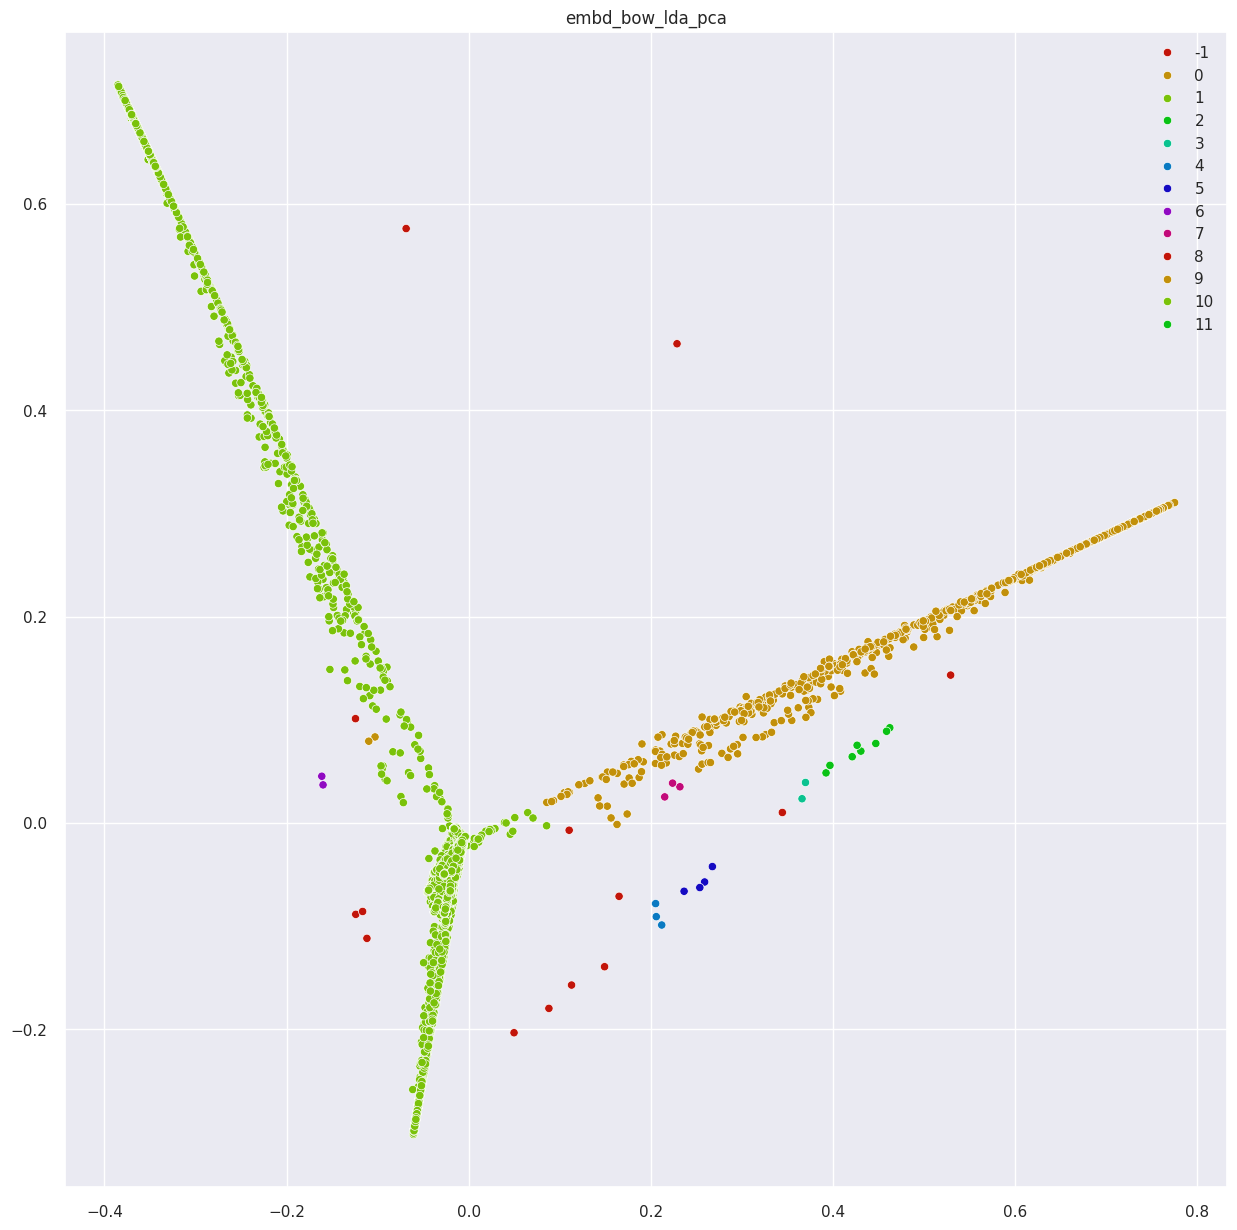

In [67]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(9, l=.4, s=.9)

# plot
sns.scatterplot(x=embd_tf_idf_lda_pca[:,0], y=embd_tf_idf_lda_pca[:,1], hue=y_pred_DB, legend='full', palette=palette)
plt.title('embd_bow_lda_pca')
plt.savefig("embd_tf_idf_lda_pca.png")
plt.show()

### analysis

#### **Representaion of each cluster**
In this part, we first find the repeated words in each cluster and then compare them with the topics obtained from lda in [Extract top words for each topic] section, and measure the similarity between them. It is the closest expression of the topic

In [72]:
from collections import Counter
import re

def get_word_frequencies(class_label):
    # Combine all text in the specified column into a single string
    cluster_text = ' '.join(df_clean[(df_clean['y_DB_pca'] == class_label)]['Title&Abstract'].astype(str).tolist())
    # Tokenize the text into words
    words = cluster_text.split()

    # Remove single quotes from each word
    words = [word.strip("',") for word in words]

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies



def get_sorted_word_frequencies(class_label):
    word_freq_dict = get_word_frequencies(class_label)
    sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True))
    return sorted_word_freq

In [73]:
def find_most_similar_list(word_freq, lists_of_words):
    # Function to calculate similarity based on frequencies
    def calculate_similarity(word_list):
        total_freq = sum(word_freq[word] for word in word_freq)
        intersection_freq = sum(word_freq[word] for word in word_list if word in word_freq)
        return intersection_freq / total_freq

    # Calculate similarity for each list of words
    similarities = [calculate_similarity(word_list) for word_list in lists_of_words]

    # Find the index of the list with the highest similarity
    most_similar_index = similarities.index(max(similarities))

    # Display results (optional)
    print("Similarities:", similarities)
    print("Most Similar List of Words:", lists_of_words[most_similar_index])

    # Return the most similar list and its index
    return lists_of_words[most_similar_index], most_similar_index

In [74]:
def get_topic_name(index):
    topic_names = [
        "Vaccine Protection and Immune Response in Mouse Models",
        "Genomic Sequencing and Mutation Analysis of Viral RNA",
        "SARS-CoV and Severe Respiratory Syndrome",
        "Transcriptional Regulation and Protein Sequencing",
        "Sensitive Diagnostic Assays for Viral Infections",
        "Recombination, Genomic Surveillance, and Pandemic Preparedness",
        "Antibody Neutralization and Vaccine Development",
        "Epidemiological Models for Disease Spread and Control",
        "Protein Structure, Binding, and Functional Domains",
        "Genetic Analysis and Outbreak Identification of Viral Strains",
        "Membrane Fusion and Viral Entry Mechanisms",
        "Respiratory Tissue Response to Influenza Infection",
        "Vaccine Development Strategies and Immune System Activation",
        "Cellular Response and Inhibition of Viral Infections",
        "Respiratory Viruses, Immune Response, and Pathogenesis",
        "Emergence and Spread of Novel Coronaviruses in China",
        "Pediatric Respiratory Infections and Hospitalization",
        "Antiviral Agents and Inhibition of Influenza",
        "Patient Serum Levels and Disease Association",
        "Peptide Therapeutics for Targeted Viral Inhibition",
        "Host-Pathogen Interactions and Cellular Signaling",
        "Hepatic Infection Models and Viral Replication",
        "Viral Receptor Binding, Mutations, and Entry",
        "Respiratory Syndrome Patients and Hospital Care",
        "Antiviral Drugs and Therapeutic Targets",
        "Animal Models for Infectious Diseases and Pathogens",
        "MERS-CoV and Respiratory Syndrome in Humans",
        "Immunological Response and System Function",
        "Biological Predictions and Methods for Genomic Analysis",
        "Clinical Presentation and Detection of Respiratory Infections",
        "Pandemic Influenza, Public Health, and Risk Management",
        "Gene Expression Analysis and Immune Responses",
        "Clinical Diagnosis and Severity of Respiratory Infections",
        "Bat Viruses, Host Transmission, and Emerging Pathogens",
        "Sample Collection, Detection, and Identification of Viruses",
        "Effect of Treatment and Control Measures on Patient Outcomes",
        "Global Health Research and Surveillance",
        "Interferon Response and Immune Activation",
        "Virus Replication Inhibition and Cellular Responses",
        "Type of Treatment and Efficient Infection Control"
    ]

    if 0 <= index < len(topic_names):
        return topic_names[index]
    else:
        return "Invalid Index"

In [75]:
def analyze_and_display_similarity(class_label, top_words):
    sorted_new_vocab = get_sorted_word_frequencies(class_label)

    most_similar_list, most_similar_index = find_most_similar_list(sorted_new_vocab, top_words_tfidf)
    max_similarity = max(most_similar_list)

    # Display results
    print("Maximum Similarity:", max_similarity)
    print("Index of Maximum Similarity:", most_similar_index)

    # Access the top words for the most similar list
    top_words_tfidf[most_similar_index]

    topic_name = get_topic_name(most_similar_index)
    print(f"Topic {most_similar_index}: {topic_name}")
    return sorted_new_vocab

most_similar_list0 = analyze_and_display_similarity(0, top_words_tfidf)
most_similar_list1 = analyze_and_display_similarity(1, top_words_tfidf)
most_similar_list2 = analyze_and_display_similarity(-1, top_words_tfidf)

# analyze_and_display_similarity(0, top_words_bow)
# analyze_and_display_similarity(1, top_words_bow)
# analyze_and_display_similarity(2, top_words_tfidf)
# analyze_and_display_similarity(3, top_words_tfidf)
# analyze_and_display_similarity(4, top_words_tfidf)
# analyze_and_display_similarity(5, top_words_tfidf)
# analyze_and_display_similarity(6, top_words_tfidf)
# analyze_and_display_similarity(7, top_words_tfidf)
# analyze_and_display_similarity(8, top_words_tfidf)
# analyze_and_display_similarity(9, top_words_tfidf)
# analyze_and_display_similarity(10, top_words_tfidf)
# analyze_and_display_similarity(11, top_words_tfidf)
# analyze_and_display_similarity(12, top_words_tfidf)
# analyze_and_display_similarity(13, top_words_tfidf)


Similarities: [0.04127138047138047, 0.03523232323232323, 0.026752861952861952, 0.025136700336700336, 0.08547878787878788, 0.028622222222222223, 0.03678922558922559, 0.1506909090909091, 0.045295622895622896, 0.09212121212121212, 0.0190006734006734, 0.05788552188552189, 0.09188956228956228, 0.04750976430976431, 0.06377912457912457, 0.08687946127946128, 0.048113131313131316, 0.04425589225589226, 0.05985185185185185, 0.034004040404040405, 0.01964713804713805, 0.05896835016835017, 0.053893602693602695, 0.06832592592592593, 0.06681212121212121, 0.0577023569023569, 0.023967676767676766, 0.03879326599326599, 0.05954478114478114, 0.06509360269360269, 0.08672861952861953, 0.016253198653198655, 0.04736969696969697, 0.041594612794612795, 0.06534141414141414, 0.040985858585858584, 0.06583164983164984, 0.024624915824915824, 0.03184377104377104, 0.05697508417508418]
Most Similar List of Words: ['epidem', 'transmiss', 'estim', 'case', 'outbreak', 'model', 'china', 'number', 'diseas', 'spread', 'data',

##### word cloud

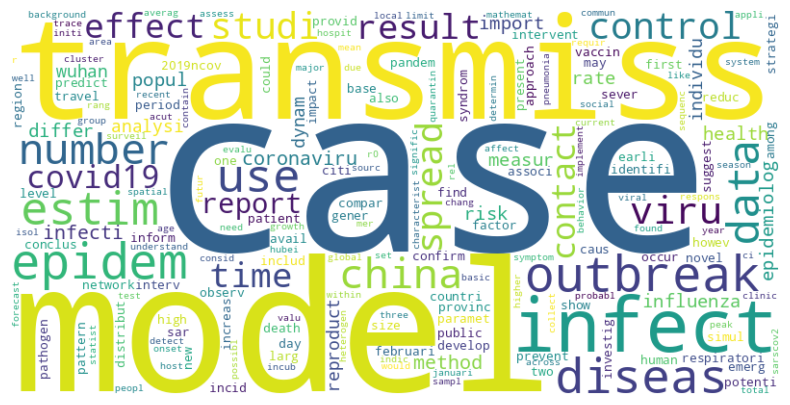

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list0

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

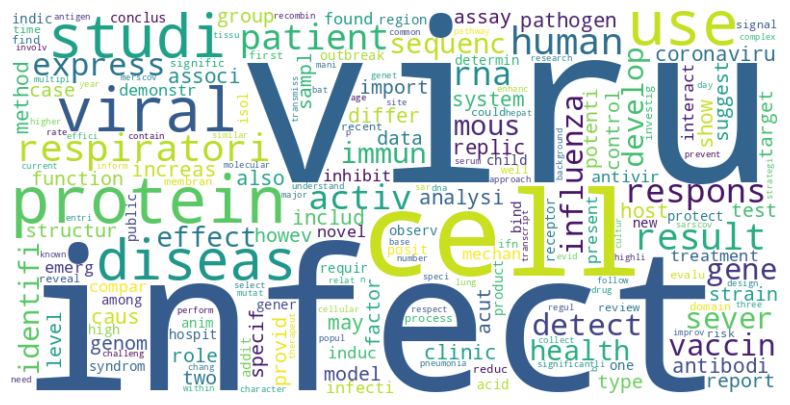

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

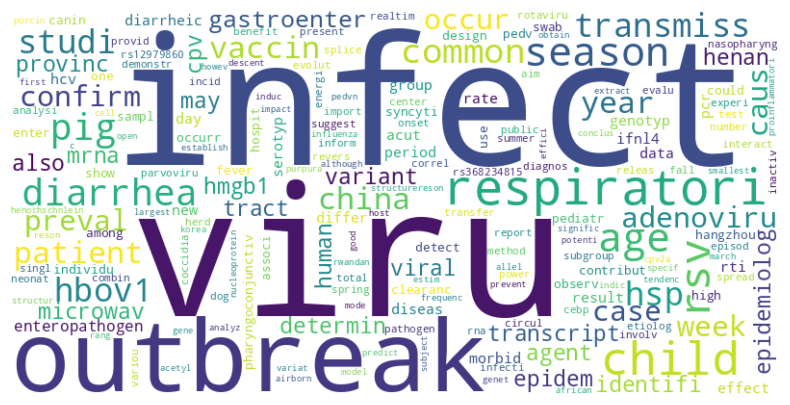

In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list2

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
22804  Prediction of COVID-19 Spreading Profiles in S...   
22805  A deterministic epidemic model for the emergen...   
22806  Data-driven discovery of clinical routes for s...   
22807  Ascertainment rate of novel coronavirus diseas...   
22808  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
22804  <jats:p>This work applies a data-driven coding...   2020-03-10   
22805  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
22806  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
22807  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
22808  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  y_DB_umap  y_DB_pca  
0      ['incub', 'period', 'epidemiolog', 'characteri...          0         0  
1      ['characterist', 'public', 'health', 'respons'...          0         0  
2      ['updat', 'estim', 'risk', 'transmiss', 'novel...          1         0  
3      ['realtim', 'forecast', '2019ncov', 'epidem', ...          1         0  
4      ['covid19', 'outbreak', 'diamond', 'princess',...          1         0  
...                                                  ...        ...       ...  
22804  ['predict', 'covid19', 'spread', 'profil', 'so...          0         0  
22805  ['determinist', 'epidem', 'model', 'emerg', 'c...          0         0  
22806  ['datadriven', 'discoveri', 'clinic', 'rout', ...          0         0  
22807  ['ascertain', 'rate', 'novel', 'coronaviru', '...         17         0  
22808  ['aerosol', 'surfac', 'stabil', 'hcov19', 'sar...          0         0  

[22809 rows x 6 columns]

## OPTICS

In [84]:
from sklearn.cluster import OPTICS
OPTICS_clustering = OPTICS(min_samples=1000)
y_pred_OPTICS = OPTICS_clustering.fit_predict(embd_tf_idf_lda_pca)
df_clean['y_optics_tf'] = y_pred_OPTICS

#### silhouette_score

In [85]:
silhouette_avg = silhouette_score(embd_tf_idf_lda_pca, y_pred_OPTICS)
silhouette_avg

-0.3459663604689823

#### davies_bouldin_score

In [86]:
from sklearn.metrics import davies_bouldin_score

In [88]:
# Calculate Davies–Bouldin index
db_index = davies_bouldin_score(embd_tf_idf_lda_pca, y_pred_OPTICS)

print(f"Davies–Bouldin index: {db_index}")

Davies–Bouldin index: 1.0487946199366378


### plot

<ipython-input-89-8c5819988300>:12: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=embd_tf_idf_lda_pca[:,0], y=embd_tf_idf_lda_pca[:,1], hue=y_pred_OPTICS, legend='full', palette=palette)


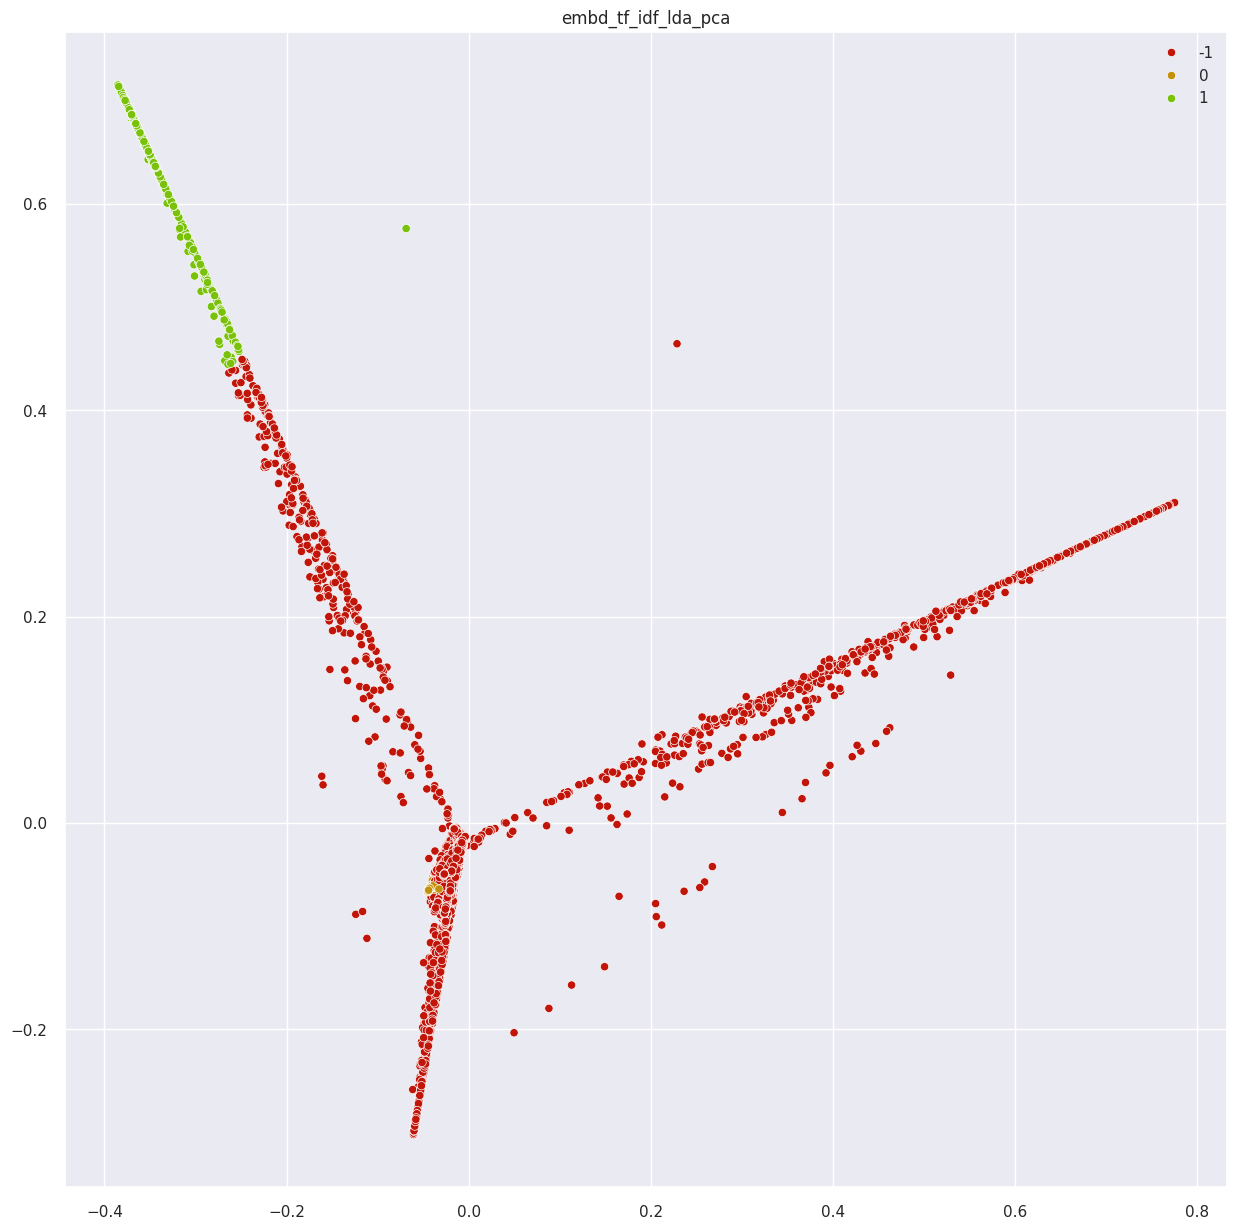

In [89]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(9, l=.4, s=.9)

# plot
sns.scatterplot(x=embd_tf_idf_lda_pca[:,0], y=embd_tf_idf_lda_pca[:,1], hue=y_pred_OPTICS, legend='full', palette=palette)
plt.title('embd_tf_idf_lda_pca')
plt.savefig("embd_tf_idf_lda_pca.png")
plt.show()

### analysis

#### **Representaion of each cluster**
In this part, we first find the repeated words in each cluster and then compare them with the topics obtained from lda in [Extract top words for each topic] section, and measure the similarity between them. It is the closest expression of the topic

In [90]:
from collections import Counter
import re

def get_word_frequencies(class_label):
    # Combine all text in the specified column into a single string
    cluster_text = ' '.join(df_clean[(df_clean['y_optics_tf'] == class_label)]['Title&Abstract'].astype(str).tolist())
    # Tokenize the text into words
    words = cluster_text.split()

    # Remove single quotes from each word
    words = [word.strip("',") for word in words]

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies



def get_sorted_word_frequencies(class_label):
    word_freq_dict = get_word_frequencies(class_label)
    sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True))
    return sorted_word_freq

In [91]:
def find_most_similar_list(word_freq, lists_of_words):
    # Function to calculate similarity based on frequencies
    def calculate_similarity(word_list):
        total_freq = sum(word_freq[word] for word in word_freq)
        intersection_freq = sum(word_freq[word] for word in word_list if word in word_freq)
        return intersection_freq / total_freq

    # Calculate similarity for each list of words
    similarities = [calculate_similarity(word_list) for word_list in lists_of_words]

    # Find the index of the list with the highest similarity
    most_similar_index = similarities.index(max(similarities))

    # Display results (optional)
    print("Similarities:", similarities)
    print("Most Similar List of Words:", lists_of_words[most_similar_index])

    # Return the most similar list and its index
    return lists_of_words[most_similar_index], most_similar_index

In [92]:
def get_topic_name(index):
    topic_names = [
        "Vaccine Protection and Immune Response in Mouse Models",
        "Genomic Sequencing and Mutation Analysis of Viral RNA",
        "SARS-CoV and Severe Respiratory Syndrome",
        "Transcriptional Regulation and Protein Sequencing",
        "Sensitive Diagnostic Assays for Viral Infections",
        "Recombination, Genomic Surveillance, and Pandemic Preparedness",
        "Antibody Neutralization and Vaccine Development",
        "Epidemiological Models for Disease Spread and Control",
        "Protein Structure, Binding, and Functional Domains",
        "Genetic Analysis and Outbreak Identification of Viral Strains",
        "Membrane Fusion and Viral Entry Mechanisms",
        "Respiratory Tissue Response to Influenza Infection",
        "Vaccine Development Strategies and Immune System Activation",
        "Cellular Response and Inhibition of Viral Infections",
        "Respiratory Viruses, Immune Response, and Pathogenesis",
        "Emergence and Spread of Novel Coronaviruses in China",
        "Pediatric Respiratory Infections and Hospitalization",
        "Antiviral Agents and Inhibition of Influenza",
        "Patient Serum Levels and Disease Association",
        "Peptide Therapeutics for Targeted Viral Inhibition",
        "Host-Pathogen Interactions and Cellular Signaling",
        "Hepatic Infection Models and Viral Replication",
        "Viral Receptor Binding, Mutations, and Entry",
        "Respiratory Syndrome Patients and Hospital Care",
        "Antiviral Drugs and Therapeutic Targets",
        "Animal Models for Infectious Diseases and Pathogens",
        "MERS-CoV and Respiratory Syndrome in Humans",
        "Immunological Response and System Function",
        "Biological Predictions and Methods for Genomic Analysis",
        "Clinical Presentation and Detection of Respiratory Infections",
        "Pandemic Influenza, Public Health, and Risk Management",
        "Gene Expression Analysis and Immune Responses",
        "Clinical Diagnosis and Severity of Respiratory Infections",
        "Bat Viruses, Host Transmission, and Emerging Pathogens",
        "Sample Collection, Detection, and Identification of Viruses",
        "Effect of Treatment and Control Measures on Patient Outcomes",
        "Global Health Research and Surveillance",
        "Interferon Response and Immune Activation",
        "Virus Replication Inhibition and Cellular Responses",
        "Type of Treatment and Efficient Infection Control"
    ]

    if 0 <= index < len(topic_names):
        return topic_names[index]
    else:
        return "Invalid Index"

In [94]:
def analyze_and_display_similarity(class_label, top_words):
    sorted_new_vocab = get_sorted_word_frequencies(class_label)

    most_similar_list, most_similar_index = find_most_similar_list(sorted_new_vocab, top_words_tfidf)
    max_similarity = max(most_similar_list)

    # Display results
    print("Maximum Similarity:", max_similarity)
    print("Index of Maximum Similarity:", most_similar_index)

    # Access the top words for the most similar list
    top_words_tfidf[most_similar_index]

    topic_name = get_topic_name(most_similar_index)
    print(f"Topic {most_similar_index}: {topic_name}")
    return sorted_new_vocab

most_similar_list0 = analyze_and_display_similarity(-1, top_words_tfidf)
most_similar_list1 = analyze_and_display_similarity(0, top_words_tfidf)
# most_similar_list2 = analyze_and_display_similarity(1, top_words_tfidf)
# most_similar_list3 = analyze_and_display_similarity(2, top_words_tfidf)
# most_similar_list4 = analyze_and_display_similarity(3, top_words_tfidf)
# most_similar_list5 = analyze_and_display_similarity(4, top_words_tfidf)
# # ...

Similarities: [0.07924114289919443, 0.06281777813314955, 0.06649976773074173, 0.0706027785276358, 0.06577377151144134, 0.06508457042216396, 0.07643409903763045, 0.0523378882638041, 0.08168483485178107, 0.07464458204093387, 0.05092976694176923, 0.08465639540046722, 0.05308015925215313, 0.07591153743143811, 0.08159567742134068, 0.05405841439170751, 0.07500970294654694, 0.06502407073722227, 0.06089417119146523, 0.057522817403105865, 0.05375414697036329, 0.07034132082487606, 0.07901506512914913, 0.05886831624423617, 0.07081753471921247, 0.04227689679779767, 0.058268626384726345, 0.0730485932761853, 0.047323136600858816, 0.06625847658962922, 0.04752232562204113, 0.05732256698394211, 0.05322521697628235, 0.0435572965627334, 0.08368521624745574, 0.06003939201708426, 0.049284600070547586, 0.07419596449411472, 0.06970271303938035, 0.051407396033414224]
Most Similar List of Words: ['lung', 'infect', 'cell', 'respiratori', 'mous', 'acut', 'respons', 'tissu', 'diseas', 'sever', 'viru', 'immun', 'e

##### word cloud

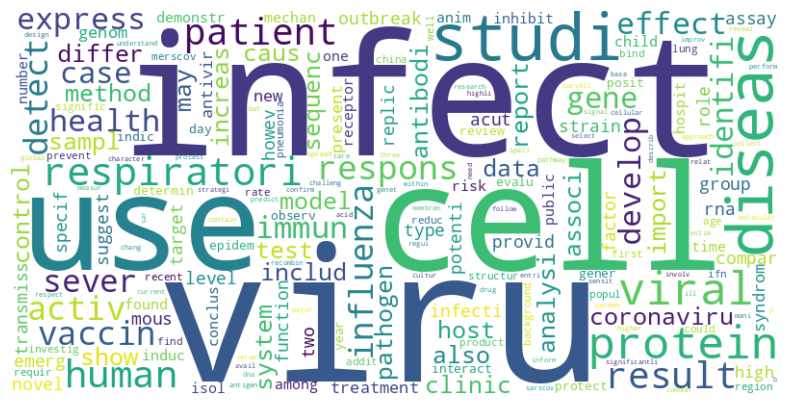

In [97]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list0

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

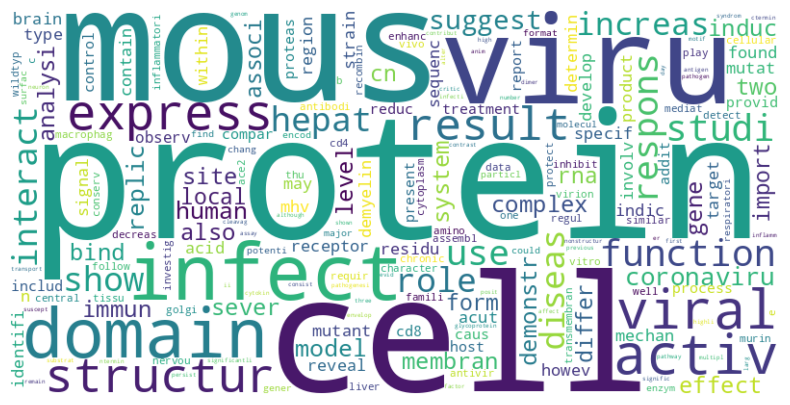

In [98]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your dictionary
word_freq = most_similar_list1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# analysis 2

# Distribution of target class

In [ ]:
df_clean

title  \
0      Incubation Period and Other Epidemiological Ch...   
1      Characteristics of and Public Health Responses...   
2      An updated estimation of the risk of transmiss...   
3      Real-time forecasts of the 2019-nCoV epidemic ...   
4      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
22804  Prediction of COVID-19 Spreading Profiles in S...   
22805  A deterministic epidemic model for the emergen...   
22806  Data-driven discovery of clinical routes for s...   
22807  Ascertainment rate of novel coronavirus diseas...   
22808  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract publish_time  \
0      The geographic spread of 2019 novel coronaviru...         2020   
1      In December 2019, cases of unidentified pneumo...         2020   
2      The basic reproduction number of an infectious...         2020   
3      The initial cluster of severe pneumonia cases ...         2020   
4      Cruise ships carry a large number of people in...         2020   
...                                                  ...          ...   
22804  <jats:p>This work applies a data-driven coding...   2020-03-10   
22805  <jats:p>Coronavirus disease (COVID-19) broke o...   2020-03-10   
22806  <jats:p>The outbreak of COVID-19 epidemic has ...   2020-03-10   
22807  <jats:p>We analyzed the epidemiological datase...   2020-03-10   
22808  <jats:p>A novel human coronavirus, now named s...   2020-03-10   

                                          Title&Abstract  \
0      ['incub', 'period', 'epidemiolog', 'characteri...   
1      ['characterist', 'public', 'health', 'respons'...   
2      ['updat', 'estim', 'risk', 'transmiss', 'novel...   
3      ['realtim', 'forecast', '2019ncov', 'epidem', ...   
4      ['covid19', 'outbreak', 'diamond', 'princess',...   
...                                                  ...   
22804  ['predict', 'covid19', 'spread', 'profil', 'so...   
22805  ['determinist', 'epidem', 'model', 'emerg', 'c...   
22806  ['datadriven', 'discoveri', 'clinic', 'rout', ...   
22807  ['ascertain', 'rate', 'novel', 'coronaviru', '...   
22808  ['aerosol', 'surfac', 'stabil', 'hcov19', 'sar...   

                                      str_Title&Abstract  y_bert  y_bert3  \
0      [ ' i n c u b ' ,   ' p e r i o d ' ,   ' e p ...       2        2   
1      [ ' c h a r a c t e r i s t ' ,   ' p u b l i ...       1        1   
2      [ ' u p d a t ' ,   ' e s t i m ' ,   ' r i s ...       2        2   
3      [ ' r e a l t i m ' ,   ' f o r e c a s t ' , ...       1        1   
4      [ ' c o v i d 1 9 ' ,   ' o u t b r e a k ' , ...       0        0   
...                                                  ...     ...      ...   
22804  [ ' p r e d i c t ' ,   ' c o v i d 1 9 ' ,   ...       0        0   
22805  [ ' d e t e r m i n i s t ' ,   ' e p i d e m ...       0        0   
22806  [ ' d a t a d r i v e n ' ,   ' d i s c o v e ...       0        0   
22807  [ ' a s c e r t a i n ' ,   ' r a t e ' ,   ' ...       0        0   
22808  [ ' a e r o s o l ' ,   ' s u r f a c ' ,   ' ...       0        0   

       y_bert_umap  y_bert_tsne  \
0                2            3   
1                4            0   
2                5            1   
3                3            1   
4                5            1   
...            ...          ...   
22804            5            1   
22805            5            1   
22806            5            1   
22807            5            1   
22808            5            1   

                                     str2_Title&Abstract  
0      [ ' i n c u b ' ,   ' p e r i o d ' ,   ' e p ...  
1      [ ' c h a r a c t e r i s t ' ,   ' p u b l i ...  
2      [ ' u p d a t ' ,   ' e s t i m ' ,   ' r i s ...  
3      [ ' r e a l t i m ' ,   ' f o r e c a s t ' , ...  
4      [ ' c o v i d 1 9 ' ,   ' o u t b r e a k ' , ...  
...                             

<Axes: xlabel='y_bert_tsne', ylabel='count'>

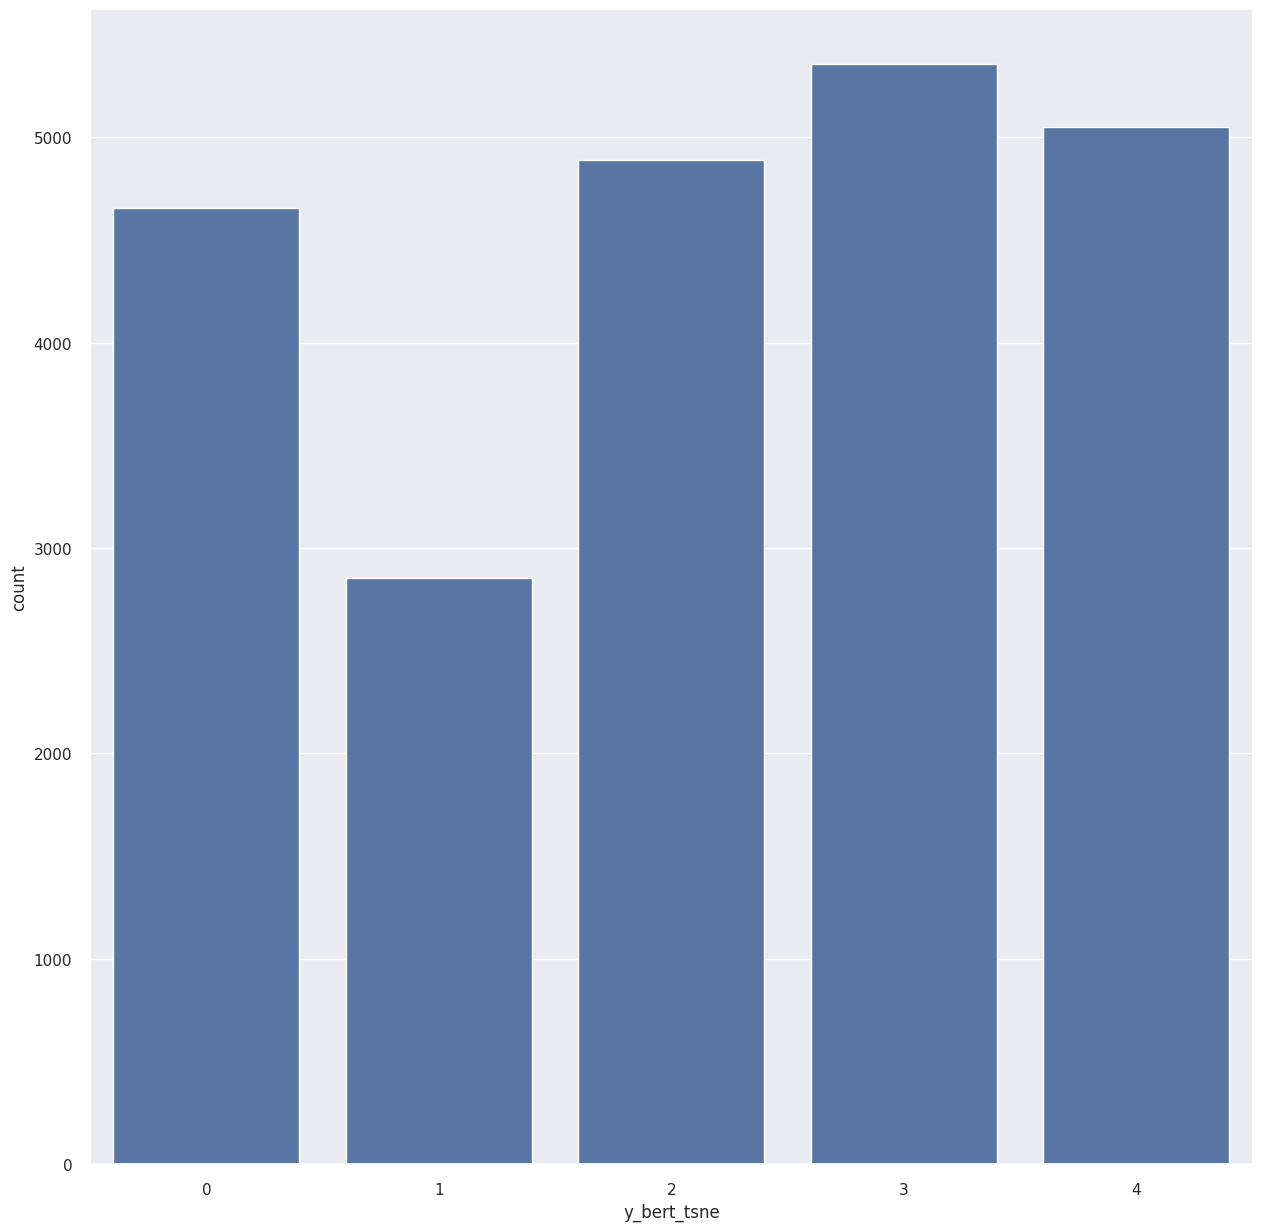

In [ ]:
sns.countplot(x='y_bert_tsne',data=df_clean)